<a href="https://colab.research.google.com/github/eleniliog/Data_journalism/blob/master/Lioga_Eleni_Teliki_Ergasia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/grap

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [ ]:
import time

from bs4 import BeautifulSoup

#driver = webdriver.Chrome()
driver.implicitly_wait(30)

In [ ]:
try:
    SCROLL_PAUSE_TIME = 5.5
    driver.get("https://www.protothema.gr/anazitisi/?q=covid")


    last_height = driver.execute_script("return document.body.scrollHeight")

    while (last_height < 142000):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(SCROLL_PAUSE_TIME)
        new_height = driver.execute_script("return document.body.scrollHeight")
        print('height:', new_height)
        if new_height == last_height:
            print('height =' , new_height)
            break
        last_height = new_height



finally:
#    driver.quit()
    print("OK")

height: 5759
height: 8026
height: 10387
height: 12680
height: 14934
height: 17205
height: 19391
height: 21658
height: 24042
height: 26100
height: 28395
height: 30661
height: 32866
height: 35226
height: 37472
height: 39950
height: 42002
height: 44316
height: 46407
height: 48504
height: 50655
height: 52729
height: 55026
height: 57304
height: 59395
height: 61766
height: 63902
height: 66085
height: 68407
height: 70584
height: 72700
height: 74915
height: 77205
height: 79428
height: 81739
height: 83897
height: 86334
height: 88458
height: 90750
height: 93040
height: 95384
height: 97628
height: 99851
height: 102255
height: 104554
height: 106844
height: 108833
height: 110862
height: 112766
height: 115293
height: 117632
height: 119772
height: 121995
height: 124201
height: 126323
height: 128799
height: 131186
height: 133501
height: 135628
height: 137782
height: 140165
height: 142376
OK


In [ ]:
soup = BeautifulSoup(driver.page_source, "html.parser")


In [ ]:
stories_list = []

stories = soup.find_all('div', { 'class': 'article' })

for story in stories:
    heading = story.find('h3')
    link = heading.find('a')
    date = story.find('time')
    datetime = date['datetime']

    
    story_dict = {
        'headline': heading.text,
        'url': link['href'],
        'date': datetime
    }
     
    stories_list.append(story_dict)

In [ ]:
print(len(stories_list))


630


In [ ]:
import pandas as pd
df = pd.DataFrame(stories_list)

In [ ]:
df



headline  ...                       date
0    \nΤην Ιατρική επιλέγει ο Δημήτρης από τη Ναύπα...  ...  2021-07-11T12:04:00+03:00
1    \nΤον πρώτο φετινό θάνατο από Covid ανακοίνωσα...  ...  2021-07-11T10:29:28+03:00
2    \nΣαρηγιάννης: 18.000 κρούσματα ημερησίως τον ...  ...  2021-07-11T09:52:00+03:00
3    \nΗ επιστροφή των rave πάρτι των 90s και ο εφι...  ...  2021-07-11T08:11:33+03:00
4    \nΗ Βόρεια Κορέα απέρριψε το εμβόλιο της Astra...  ...  2021-07-10T21:38:00+03:00
..                                                 ...  ...                        ...
625  \nΜπάιντεν: «Σκανδαλώδης» η αναχαίτιση του αερ...  ...  2021-05-25T05:00:19+03:00
626  \nEE: «Eπίθεση στη δημοκρατία και στην ευρωπαϊ...  ...  2021-05-25T04:24:36+03:00
627  \nΣιγκαπούρη: Μεικτές τάσεις στις τιμές του πε...  ...  2021-05-25T04:12:13+03:00
628  \nΜαλαισία: Πάνω από 200 τραυματίες σε ατύχημα...  ...  2021-05-25T03:41:47+03:00
629  \nΒραζιλία: Συνελήφθη ο Ιταλός μαφιόζος Ρόκο Μ...  ...  2021-05-25T03:23:00+03:00

[630 rows x 3 columns]

In [ ]:
df.sort_values(by='date', ascending = False)

headline  ...                       date
0    \nΤην Ιατρική επιλέγει ο Δημήτρης από τη Ναύπα...  ...  2021-07-11T12:04:00+03:00
1    \nΤον πρώτο φετινό θάνατο από Covid ανακοίνωσα...  ...  2021-07-11T10:29:28+03:00
2    \nΣαρηγιάννης: 18.000 κρούσματα ημερησίως τον ...  ...  2021-07-11T09:52:00+03:00
3    \nΗ επιστροφή των rave πάρτι των 90s και ο εφι...  ...  2021-07-11T08:11:33+03:00
4    \nΗ Βόρεια Κορέα απέρριψε το εμβόλιο της Astra...  ...  2021-07-10T21:38:00+03:00
..                                                 ...  ...                        ...
625  \nΜπάιντεν: «Σκανδαλώδης» η αναχαίτιση του αερ...  ...  2021-05-25T05:00:19+03:00
626  \nEE: «Eπίθεση στη δημοκρατία και στην ευρωπαϊ...  ...  2021-05-25T04:24:36+03:00
627  \nΣιγκαπούρη: Μεικτές τάσεις στις τιμές του πε...  ...  2021-05-25T04:12:13+03:00
628  \nΜαλαισία: Πάνω από 200 τραυματίες σε ατύχημα...  ...  2021-05-25T03:41:47+03:00
629  \nΒραζιλία: Συνελήφθη ο Ιταλός μαφιόζος Ρόκο Μ...  ...  2021-05-25T03:23:00+03:00

[630 rows x 3 columns]

In [ ]:
df.tail()


headline  ...                       date
395  \nΕΕ: Αμοιβαιότητα στην υποδοχή τουριστών ζητο...  ...  2021-06-07T12:13:00+03:00
396  \nΕισαγγελέας για την θνητότητα στη ΜΕΘ Covid ...  ...  2021-06-07T12:12:00+03:00
397  \nΜειωμένα ενοίκια - ΑΑΔΕ: Σε λειτουργία η πλα...  ...  2021-06-07T11:04:00+03:00
398  \nΟυκρανία: Κατέγραψαν τον μικρότερο αριθμό κρ...  ...  2021-06-07T10:32:00+03:00
399  \nΤα αλλόκοτα γραφεία της μετά – Covid εποχής:...  ...  2021-06-07T08:05:32+03:00

[5 rows x 3 columns]

In [ ]:
df.to_csv("covid.csv", index=False)


**Βλέπουμε πόσες γραμμές και πόσες στήλες έχουν τα δεδομένα μας**

In [ ]:
df.shape

(90, 3)

In [ ]:
import pandas as pd
%matplotlib inline

In [ ]:
df = pd.read_csv("covid.csv")

In [ ]:
df[100:190]

Unnamed: 0                                           headline  \
100         100  \n«Κούρεμα» ενοικίων: Πoιοι έχουν μια δεύτερη ...   
101         101  \nΟ Κωστής Μαραβέγιας πάει Βεάκειο με τη «Λόλα...   
102         102  \n«Το σπίτι με τα φίδια»: Η μεταφορά στο σήμερ...   
103         103  \nΠαραδοσιακή γιορτή στον Λευκό Οίκο με μπέργκ...   
104         104  \nΣκέρτσος για τη Δημόσια Υγεία: Αυτή είναι η ...   
105         105  \nΒρετανία: Εκατοντάδες swingers έστησαν φεστι...   
106         106  \nΒρετανοί γιατροί θέλουν να διατηρηθούν ορισμ...   
107         107  \nΟι «πρωταθλητές» και οι «ουραγοί» του εμβολι...   
108         108  \nΛένα Δροσάκη και Αλέξανδρος Μπουρδούμης μιλο...   
109         109  \nΓουόρεν Μπάφετ: Τι με δίδαξε η πανδημία – Η ...   
110         110  \nΟ Γιάννης Τσιμιτσέλης δέχθηκε καταιγισμό υβρ...   
111         111  \nΔιακοπές στα νησιά: Αλλάζουν όλα από Δευτέρα...   
112         112  \nΝορβηγία: Η κυβέρνηση αποζημιώνει εμβολιασμέ...   
113         113  \nΘα μπορούν να ταξιδέψουν στην Ευρώπη οι Βρετ...   
114         114  \nΣυνάντηση Τζόνσον - Μέρκελ: Οι περιορισμοί σ...   
115         115                       \nWe shall never surrender\n   
116         116  \nΜε «Green Pass» ή αρνητικό τεστ και στα μαγα...   
117         117  \nΣυγκινητική επανένωση για Χάρι και Ουίλιαμ σ...   
118         118  \nΤαϊλάνδη: Άνοιξε και πάλι για τους εμβολιασμ...   
119         119  \nBρετανικά Ανάκτορα: Σήμερα τα αποκαλυπτήρια ...   
120         120  \nΜειωμένα ενοίκια Μαΐου: Άνοιξε η πλατφόρμα τ...   
121         121  \nΟι fashion editors του Marie Claire διαλέγου...   
122         122  \nΕμβολιασμένοι και ανεμβολίαστοι: Έτσι θα μπα...   
123         123  \nΕπιστρέφει στην πίστα: Πάνος Κιάμος μόνο για...   
124         124  \nΣκέρτσος: Δεν θα ξανακλείσει η οικονομία - Μ...   
125         125  \nΣε εφαρμογή από σήμερα το «Ευρωπαϊκό Ψηφιακό...   
126         126                              \nΚαταστρόφα ρεεεεε\n   
127         127  \nΨηφιακό πιστοποιητικό εμβολιασμού: Πρεμιέρα ...   
128         128  \nΠρίγκιπας Χάρι: «Μυστική»  εμφάνιση - έκπληξ...   
129         129  \nBloomberg Global Covid list– The best countr...   
130         130  \nΜειωμένα ενοίκια: Σε ποιους καταβάλλονται οι...   
131         131  \nΓερμανία: Αίρεται η ταξιδιωτική προειδοποίησ...   
132         132  \nΒρετανία: 117 θάνατοι από τη μετάλλαξη Δέλτα...   
133         133  \nΙδιοκτήτες ακινήτων: Σήμερα η πληρωμή των απ...   
134         134  \nΜε σπίτια, ράβδους χρυσού, μετρητά και... αγ...   
135         135  \nΓαλλία: Η μετάλλαξη Δέλτα «φέρνει» τέταρτο -...   
136         136  \nΠοια είναι τα 5 νέα φάρμακα που μπαίνουν στη...   
137         137  \nΜητσοτάκης: Θα καλύψουμε το χαμένο έδαφος τη...   
138         138  \nΕλάχιστα και πολύ ήπια τα περιστατικά μυοκαρ...   
139         139  \nΚοντοζαμάνης: Ξεκινούν άμεσα οι κατ' οίκον ε...   
140         140  \nΤζόνσον: «Θα μάθουμε να ζούμε με την Covid σ...   
141         141  \nΚομισιόν: Στη φαρέτρα της ΕΕ πέντε υποψήφια ...   
142         142  \nΈρχεται σύσταση για εμβολιασμό εφήβων 15-17 ...   
143         143  \nΙαπωνία: Η αύξηση των κρουσμάτων προκαλεί φό...   
144         144  \n Τον υποχρεωτικό εμβολιασμό εξετάζει η Πολων...   
145         145           \n«Φοβού» τα €150 και εμβόλια φέροντας\n   
146         146  \nΔέλεαρ για τους 18-25 η «Κάρτα Ελευθερίας» -...   
147         147  \nΜειωμένα ενοίκια: Την Τετάρτη οι αποζημιώσει...   
148         148  \nΠαγκόσμιος συναγερμός για τη μετάλλαξη Δέλτα...   
149         149  \nΣάρα Γκίλμπερτ: Η επιστήμονας πίσω από το εμ...   
150         150  \nΒρετανία: Πρώην αεροσυνοδός αποκαλύπτει τα.....   
151         151  \nΒρετανία: Ο Ματ Χάνκοκ ξύπνησε νυχτιάτικα το...   
152         152  \nΒρετανία: Επιστροφή στην κανονικότητα «χωρίς...   
153         153  \nΡωσία: Ρεκόρ νέων θανάτων λόγω Covid σε Μόσχ...   
154         154  \nΤα σούπερ γιοτ των πλουσίων ρίχνουν... άγκυρ...   
155         155  \nΜητσοτάκης: Προπληρωμένη κάρτα ύψους 150 ευρ...   
156         156

**Κάνοντας groupby, βλέπουμε ανά πόση ώρα δημοσιεύονται ειδήσεις με θέμα τον κορονοϊό**

In [ ]:
df[['date','headline']].groupby('date').count()

headline
date                               
2021-05-25 01:29:45+03:00         1
2021-05-25 01:45:00+03:00         1
2021-05-25 02:06:00+03:00         1
2021-05-25 02:39:20+03:00         1
2021-05-25 03:07:29+03:00         1
...                             ...
2021-07-09 21:28:00+03:00         1
2021-07-10 08:49:00+03:00         1
2021-07-10 11:28:51+03:00         1
2021-07-10 13:11:00+03:00         1
2021-07-10 14:01:10+03:00         1

[624 rows x 1 columns]

**Βλέπουμε τι στήλες έχουμε στα δεδομένα μας αλλά και τι τύπος είναι κάθε στήλη**

In [ ]:
df.columns

Index(['headline', 'url', 'date'], dtype='object')

In [ ]:
df.dtypes

headline    object
url         object
date        object
dtype: object

**Ας ταξινομήσουμε σύμφωνα με την ημερομηνία κάθε είδησης**

In [ ]:
df.sort_values(by='date', ascending = False).head(20)

headline  ...                       date
0   \nΕμβόλια για τον κορωνοϊό: Προστατεύουν σε πο...  ...  2021-07-10T14:01:10+03:00
1   \nΣυναγερμός για κρούσματα σε 4 κατασκηνώσεις ...  ...  2021-07-10T13:11:00+03:00
2   \nΟ Χάνκοκ για πρώτη φορά σε δημόσια θέα μετά ...  ...  2021-07-10T11:28:51+03:00
3   \nΤζανάκης: Τον Αύγουστο στο πιθανότερο σενάρι...  ...  2021-07-10T08:49:00+03:00
4   \nΜετάλλαξη Δέλτα: Το σχέδιο της κυβέρνησης γι...  ...  2021-07-09T21:28:00+03:00
5   \nΚρήτη: «Μαϊμού» η καταγγελία για την κλοπή 8...  ...  2021-07-09T20:38:54+03:00
6   \nΦεστιβάλ Καννών: Όταν έκλαψε ο Ματ Ντέιμον -...  ...  2021-07-09T18:54:00+03:00
7   \nΑυστρία: Επιμένει η κυβέρνηση στη χαλάρωση τ...  ...  2021-07-09T18:31:41+03:00
8   \nΣύψας: Το καλοκαίρι του 2022 τελειώνουμε με ...  ...  2021-07-09T15:24:00+03:00
9   \nΒρετανία: Ραγδαία αύξηση 32% στα κρούσματα μ...  ...  2021-07-09T14:16:00+03:00
10  \nΟργισμένοι οι χορηγοί των Ολυμπιακών Αγώνων ...  ...  2021-07-09T13:46:00+03:00
11  \nΓιάννης Δράγνης: Γιατί έχουμε άλμα στις διακ...  ...  2021-07-09T12:47:00+03:00
12  \nΆντονι Φάουτσι: «Ανεμβολίαστο το 99,2% των α...  ...  2021-07-09T12:26:00+03:00
13  \nΠιερρακάκης: Από τις 15 Ιουλίου η εφαρμογή γ...  ...  2021-07-09T11:41:00+03:00
14  \nΑνάρπαστες οι «πορτοκαλί χώρες» για τους Βρε...  ...  2021-07-09T11:07:00+03:00
15  \nΣτο 83,5% η αποτελεσματικότητα του CoronaVac...  ...  2021-07-09T09:30:00+03:00
16  \nΕστίαση: Τι ισχύει με τα νέα μέτρα και το Co...  ...  2021-07-09T09:00:00+03:00
17  \nΠερίπου 1.400 νέες μολύνσεις και 13 νέοι θάν...  ...  2021-07-09T08:39:00+03:00
18  \nΦάουτσι: Εκφράζουν «πολιτική δήλωση» όσοι αρ...  ...  2021-07-09T08:32:00+03:00
19  \nΤο σχέδιο για τη μετάλλαξη Δέλτα: Τέλος στο ...  ...  2021-07-09T06:41:00+03:00

[20 rows x 3 columns]

**Φτιάχνουμε νέες παραμέτρους στο dataframe, τη χρονιά (year), το μήνα (month) και τη μέρα, δημοσίευσης της κάθε είδησης**

In [ ]:
from datetime import timedelta
from datetime import datetime as dt

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df

headline  \
0    \nΤην Ιατρική επιλέγει ο Δημήτρης από τη Ναύπα...   
1    \nΤον πρώτο φετινό θάνατο από Covid ανακοίνωσα...   
2    \nΣαρηγιάννης: 18.000 κρούσματα ημερησίως τον ...   
3    \nΗ επιστροφή των rave πάρτι των 90s και ο εφι...   
4    \nΗ Βόρεια Κορέα απέρριψε το εμβόλιο της Astra...   
..                                                 ...   
625  \nΜπάιντεν: «Σκανδαλώδης» η αναχαίτιση του αερ...   
626  \nEE: «Eπίθεση στη δημοκρατία και στην ευρωπαϊ...   
627  \nΣιγκαπούρη: Μεικτές τάσεις στις τιμές του πε...   
628  \nΜαλαισία: Πάνω από 200 τραυματίες σε ατύχημα...   
629  \nΒραζιλία: Συνελήφθη ο Ιταλός μαφιόζος Ρόκο Μ...   

                                                   url  \
0    https://www.protothema.gr/greece/article/11421...   
1    https://www.protothema.gr/koronoios-live/artic...   
2    https://www.protothema.gr/koronoios-live/artic...   
3    https://www.protothema.gr/greece/article/11419...   
4    https://www.protothema.gr/world/article/114204...   
..                                                 ...   
625  https://www.protothema.gr/world/article/112711...   
626  https://www.protothema.gr/world/article/112711...   
627  https://www.protothema.gr/economy/article/1127...   
628  https://www.protothema.gr/world/article/112710...   
629  https://www.protothema.gr/world/article/112710...   

                         date  \
0   2021-07-11 12:04:00+03:00   
1   2021-07-11 10:29:28+03:00   
2   2021-07-11 09:52:00+03:00   
3   2021-07-11 08:11:33+03:00   
4   2021-07-10 21:38:00+03:00   
..                        ...   
625 2021-05-25 05:00:19+03:00   
626 2021-05-25 04:24:36+03:00   
627 2021-05-25 04:12:13+03:00   
628 2021-05-25 03:41:47+03:00   
629 2021-05-25 03:23:00+03:00   

                                             tokenized  uniq_wds  
0     την ιατρική επιλέγει ο δημήτρης από τη ναύπακ...        18  
1     τον πρώτο φετινό θάνατο από covid ανακοίνωσαν...         9  
2     σαρηγιάννης 18000 κρούσματα ημερησίως τον οκτ...        11  
3     η επιστροφή των rave πάρτι των 90s και ο εφιά...        11  
4     η βόρεια κορέα απέρριψε το εμβόλιο της astraz...        13  
..                                                 ...       ...  
625   μπάιντεν σκανδαλώδης η αναχαίτιση του αεροσκά...        11  
626   ee eπίθεση στη δημοκρατία και στην ευρωπαϊκή ...        16  
627   σιγκαπούρη μεικτές τάσεις στις τιμές του πετρ...         9  
628   μαλαισία πάνω από 200 τραυματίες σε ατύχημα σ...        14  
629   βραζιλία συνελήφθη ο ιταλός μαφιόζος ρόκο μορ...        15  

[630 rows x 5 columns]

In [ ]:
df.set_index('date')


headline                                                url
date                                                                                                                           
2021-07-11 12:04:00+03:00  \nΤην Ιατρική επιλέγει ο Δημήτρης από τη Ναύπα...  https://www.protothema.gr/greece/article/11421...
2021-07-11 10:29:28+03:00  \nΤον πρώτο φετινό θάνατο από Covid ανακοίνωσα...  https://www.protothema.gr/koronoios-live/artic...
2021-07-11 09:52:00+03:00  \nΣαρηγιάννης: 18.000 κρούσματα ημερησίως τον ...  https://www.protothema.gr/koronoios-live/artic...
2021-07-11 08:11:33+03:00  \nΗ επιστροφή των rave πάρτι των 90s και ο εφι...  https://www.protothema.gr/greece/article/11419...
2021-07-10 21:38:00+03:00  \nΗ Βόρεια Κορέα απέρριψε το εμβόλιο της Astra...  https://www.protothema.gr/world/article/114204...
...                                                                      ...                                                ...
2021-05-25 05:00:19+03:00  \nΜπάιντεν: «Σκανδαλώδης» η αναχαίτιση του αερ...  https://www.protothema.gr/world/article/112711...
2021-05-25 04:24:36+03:00  \nEE: «Eπίθεση στη δημοκρατία και στην ευρωπαϊ...  https://www.protothema.gr/world/article/112711...
2021-05-25 04:12:13+03:00  \nΣιγκαπούρη: Μεικτές τάσεις στις τιμές του πε...  https://www.protothema.gr/economy/article/1127...
2021-05-25 03:41:47+03:00  \nΜαλαισία: Πάνω από 200 τραυματίες σε ατύχημα...  https://www.protothema.gr/world/article/112710...
2021-05-25 03:23:00+03:00  \nΒραζιλία: Συνελήφθη ο Ιταλός μαφιόζος Ρόκο Μ...  https://www.protothema.gr/world/article/112710...

[630 rows x 2 columns]

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

In [ ]:
df

headline  ...                       date
0    \nΤην Ιατρική επιλέγει ο Δημήτρης από τη Ναύπα...  ...  2021-07-11T12:04:00+03:00
1    \nΤον πρώτο φετινό θάνατο από Covid ανακοίνωσα...  ...  2021-07-11T10:29:28+03:00
2    \nΣαρηγιάννης: 18.000 κρούσματα ημερησίως τον ...  ...  2021-07-11T09:52:00+03:00
3    \nΗ επιστροφή των rave πάρτι των 90s και ο εφι...  ...  2021-07-11T08:11:33+03:00
4    \nΗ Βόρεια Κορέα απέρριψε το εμβόλιο της Astra...  ...  2021-07-10T21:38:00+03:00
..                                                 ...  ...                        ...
625  \nΜπάιντεν: «Σκανδαλώδης» η αναχαίτιση του αερ...  ...  2021-05-25T05:00:19+03:00
626  \nEE: «Eπίθεση στη δημοκρατία και στην ευρωπαϊ...  ...  2021-05-25T04:24:36+03:00
627  \nΣιγκαπούρη: Μεικτές τάσεις στις τιμές του πε...  ...  2021-05-25T04:12:13+03:00
628  \nΜαλαισία: Πάνω από 200 τραυματίες σε ατύχημα...  ...  2021-05-25T03:41:47+03:00
629  \nΒραζιλία: Συνελήφθη ο Ιταλός μαφιόζος Ρόκο Μ...  ...  2021-05-25T03:23:00+03:00

[630 rows x 3 columns]

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df.to_csv("/content/gdrive/My Drive/Colab Notebooks/protothema.tsv", sep='\t')


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/protothema.tsv", sep='\t')


In [ ]:
df

Unnamed: 0  Unnamed: 0.1  ... month day
0             0             0  ...     7  11
1             1             1  ...     7  11
2             2             2  ...     7  11
3             3             3  ...     7  11
4             4             4  ...     7  10
..          ...           ...  ...   ...  ..
625         625           625  ...     5  25
626         626           626  ...     5  25
627         627           627  ...     5  25
628         628           628  ...     5  25
629         629           629  ...     5  25

[630 rows x 8 columns]

**Κάνουμε ένα διάγραμμα για να δούμε πόσες ειδήσεις γράφτηκαν το μήνα Ιούνιο και πόσες το μήνα Ιούλιο**

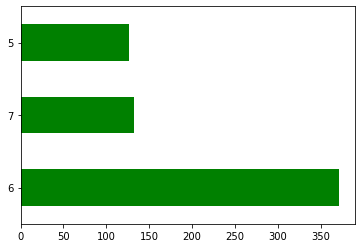

In [ ]:
df['month'].value_counts().head(10).plot(kind='barh',color='green')

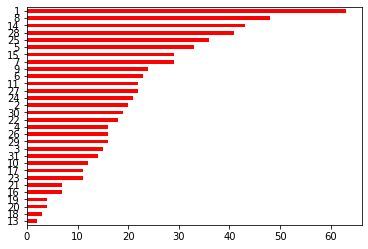

In [ ]:
df['day'].value_counts().head(30).sort_values(ascending=True).plot(kind='barh',color='red')

**Ανάλυση Twitter **

In [ ]:
!pip install Twython
import pandas as pd
import numpy as np 
from twython import Twython

CONSUMER_KEY = "yVBbCoX3IvNiVkkoMIwXI3JWw"
CONSUMER_SECRET = "pB4qPx3dPibNiXlIhI4QiJEP3V2VKmByujUhOzpYOOb7Ip5kMj"
OAUTH_TOKEN = "1397848373709918209-sN5SYoyCKsV4nbl6lcoxZ2mtTVPl0n"
OAUTH_TOKEN_SECRET = "CYsZK1SfELY6exJw74pUEvuCjMXLRy8w9gYWEHTT3lFJC"
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

In [ ]:
tweetsL = []
try:
    user_timeline = twitter.get_user_timeline(screen_name='eody_gr',count=100, tweet_mode = 'extended'  )
except TwythonError as e:
    print("Error getting tweets:", e)
print("I Got:", len(user_timeline), " tweets")
for tweet in user_timeline:
    tweetsL.append(tweet)

I Got: 100  tweets


In [ ]:
while len(user_timeline) != 0: 
    try:
        user_timeline = twitter.get_user_timeline(screen_name='eody_gr',count=100,
                                                  tweet_mode = 'extended', max_id=user_timeline[len(user_timeline)-1]['id']-1)
    except TwythonError as e:
        print("Error getting tweets:", e)
    if len(user_timeline) > 0:
        print("I Got:", len(user_timeline), " tweets more... Last ID:", user_timeline[len(user_timeline)-1]['id']-1)
    for tweet in user_timeline:
        tweetsL.append(tweet)
print("I got :", len(tweetsL), " in total!!!")

I Got: 100  tweets more... Last ID: 1388142922391072767
I Got: 100  tweets more... Last ID: 1376909146558201858
I Got: 100  tweets more... Last ID: 1363415311618347009
I Got: 100  tweets more... Last ID: 1352641864973901824
I Got: 100  tweets more... Last ID: 1342858370391408642
I Got: 100  tweets more... Last ID: 1326160620086026241
I Got: 100  tweets more... Last ID: 1303722980636323839
I Got: 100  tweets more... Last ID: 1270377351046627329
I Got: 100  tweets more... Last ID: 1255164803557003263
I Got: 100  tweets more... Last ID: 1245038512916893695
I Got: 100  tweets more... Last ID: 1239426743699746816
I Got: 100  tweets more... Last ID: 1234740978503868415
I Got: 100  tweets more... Last ID: 1224320019531751425
I Got: 100  tweets more... Last ID: 1206560568737443846
I Got: 100  tweets more... Last ID: 1197968818175447042
I Got: 100  tweets more... Last ID: 1188925540868218880
I Got: 100  tweets more... Last ID: 1174816462223138815
I Got: 100  tweets more... Last ID: 115522103814

In [ ]:
len(tweetsL)

3248

In [ ]:
for tweet in tweetsL:
    print(tweet['created_at'],tweet['full_text'])

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
Mon May 24 17:49:30 +0000 2021 Σημεία δωρεάν ελέγxου #COVID19 από τις #ΚΟΜΥ του #ΕΟΔΥ - Τρίτη 25 Μαΐου: https://t.co/YKzZJpBiSE https://t.co/6dyqkjQooW
Mon May 24 14:38:31 +0000 2021 Ημερήσια έκθεση επιτήρησης #COVID19 (24/05/2021)  #ΕΟΔΥ: https://t.co/2MMYJ2ONzH
Sun May 23 16:34:01 +0000 2021 Σημεία δωρεάν ελέγxου #COVID19 από τις #ΚΟΜΥ του #ΕΟΔΥ - Δευτέρα 24 Μαΐου: https://t.co/QGUipUyVKl https://t.co/sQgpEjOTCW
Sun May 23 14:36:55 +0000 2021 Ημερήσια έκθεση επιτήρησης #COVID19 (23/05/2021) - #ΕΟΔΥ: https://t.co/BNFbhs8edo
Sat May 22 18:02:19 +0000 2021 Δωρεάν rapid test #COVID19, σε κεντρικά σημεία σε όλη την επικράτεια, από τις Κινητές Ομαδες Υγείας # ΚΟΜΥ του #ΕΟΔΥ, αύριο, Κυριακή 23 Μαΐου: https://t.co/hz05mTD8w2 https://t.co/O1Zh0sFP9l
Sat May 22 14:37:19 +0000 2021 Ημερήσια έκθεση επιτήρησης #COVID19 (22/05/2021) - #ΕΟΔΥ: https://t.co/LZLcxi3gDH
Sat May 22 13:28:24 +0000 2021 Οδηγίες από τον #ΕΟΔΥ για την προστασία κατά τη 

In [ ]:
tweets_df = pd.DataFrame(tweetsL)

In [ ]:
tweets_df.head()

created_at                   id               id_str  \
0  Sat Jul 10 18:45:48 +0000 2021  1413932482727141377  1413932482727141377   
1  Sat Jul 10 14:42:25 +0000 2021  1413871236858499074  1413871236858499074   
2  Sat Jul 10 14:37:53 +0000 2021  1413870093822480387  1413870093822480387   
3  Fri Jul 09 16:57:10 +0000 2021  1413542757923184642  1413542757923184642   
4  Fri Jul 09 14:53:18 +0000 2021  1413511585251745792  1413511585251745792   

                                           full_text  truncated  \
0  Σημεία δωρεάν ελέγχου #COVID19 από τις #ΚΟΜΥ τ...      False   
1  Ημερήσια έκθεση επιτήρησης #COVID19  (10/07/20...      False   
2  RT @arkouman: Ο μέσος όρος ηλικίας των 2.327 ν...      False   
3  Σημεία δωρεάν ελέγχου #COVID19, σε ολόκληρη τη...      False   
4  Ημερήσια έκθεση επιτήρησης #COVID19  (09/07/20...      False   

  display_text_range                                           entities  \
0            [0, 99]  {'hashtags': [{'text': 'COVID19', 'indices': [...   
1            [0, 81]  {'hashtags': [{'text': 'COVID19', 'indices': [...   
2           [0, 140]  {'hashtags': [{'text': 'ΕΟΔΥ', 'indices': [132...   
3           [0, 127]  {'hashtags': [{'text': 'COVID19', 'indices': [...   
4            [0, 81]  {'hashtags': [{'text': 'COVID19', 'indices': [...   

                                   extended_entities  \
0  {'media': [{'id': 1413932177922961412, 'id_str...   
1                                                NaN   
2                                                NaN   
3  {'media': [{'id': 1413542724125528065, 'id_str...   
4                                                NaN   

                                              source  in_reply_to_status_id  \
0  <a href="https://mobile.twitter.com" rel="nofo...                    NaN   
1  <a href="http://twitter.com/download/iphone" r...                    NaN   
2  <a href="http://twitter.com/download/iphone" r...                    NaN   
3  <a href="http://twitter.com/download/iphone" r...                    NaN   
4  <a href="http://twitter.com/download/iphone" r...                    NaN   

  in_reply_to_status_id_str  in_reply_to_user_id in_reply_to_user_id_str  \
0                      None                  NaN                    None   
1                      None                  NaN                    None   
2                      None                  NaN                    None   
3                      None                  NaN                    None   
4                      None                  NaN                    None   

  in_reply_to_screen_name                                               user  \
0                    None  {'id': 717964915, 'id_str': '717964915', 'name...   
1                    None  {'id': 717964915, 'id_str': '717964915', 'name...   
2                    None  {'id': 717964915, 'id_str': '717964915', 'name...   
3                    None  {'id': 717964915, 'id_str': '717964915', 'name...   
4                    None  {'id': 717964915, 'id_str': '717964915', 'name...   

    geo coordinates place contributors  is_quote_status  retweet_count  \
0  None        None  None         None            False              3   
1  None        None  None         None            False              0   
2  None        None  None         None            False             69   
3  None        None  None         None            False              4   
4  None        None  None         None            False              5   

   favorite_count  favorited  retweeted possibly_sensitive lang  \
0               8      False      False              False   el   
1               7      False      False              False   el   
2               0      False      False                NaN   el   
3              13      False      False              False   el   
4              12      False      False              False   el   

                                    retweeted_status  quoted_status_id  \
0                     

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
tweets_df.to_csv("/content/gdrive/My Drive/Colab Notebooks/eody_gr.tsv", sep='\t')


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
full_tweets_df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/eody_gr.tsv", sep='\t')


In [ ]:
full_tweets_df.head(20)


Unnamed: 0                      created_at                   id  \
0            0  Sat Jul 10 18:45:48 +0000 2021  1413932482727141377   
1            1  Sat Jul 10 14:42:25 +0000 2021  1413871236858499074   
2            2  Sat Jul 10 14:37:53 +0000 2021  1413870093822480387   
3            3  Fri Jul 09 16:57:10 +0000 2021  1413542757923184642   
4            4  Fri Jul 09 14:53:18 +0000 2021  1413511585251745792   
5            5  Thu Jul 08 17:31:46 +0000 2021  1413189079047581698   
6            6  Thu Jul 08 15:06:48 +0000 2021  1413152594176790528   
7            7  Thu Jul 08 15:02:51 +0000 2021  1413151601942925320   
8            8  Thu Jul 08 07:05:36 +0000 2021  1413031498144534530   
9            9  Wed Jul 07 18:06:01 +0000 2021  1412835310690578433   
10          10  Wed Jul 07 14:41:18 +0000 2021  1412783790519431168   
11          11  Tue Jul 06 18:37:04 +0000 2021  1412480734800093189   
12          12  Tue Jul 06 15:30:39 +0000 2021  1412433822826876933   
13          13  Tue Jul 06 04:10:59 +0000 2021  1412262776345608194   
14          14  Mon Jul 05 14:47:50 +0000 2021  1412060657046990850   
15          15  Mon Jul 05 06:59:47 +0000 2021  1411942870689501188   
16          16  Sun Jul 04 17:02:32 +0000 2021  1411732167428907008   
17          17  Sun Jul 04 14:42:59 +0000 2021  1411697051813941252   
18          18  Sun Jul 04 09:47:30 +0000 2021  1411622690553794564   
19          19  Sat Jul 03 18:33:50 +0000 2021  1411392756233080833   

                 id_str                                          full_text  \
0   1413932482727141377  Σημεία δωρεάν ελέγχου #COVID19 από τις #ΚΟΜΥ τ...   
1   1413871236858499074  Ημερήσια έκθεση επιτήρησης #COVID19  (10/07/20...   
2   1413870093822480387  RT @arkouman: Ο μέσος όρος ηλικίας των 2.327 ν...   
3   1413542757923184642  Σημεία δωρεάν ελέγχου #COVID19, σε ολόκληρη τη...   
4   1413511585251745792  Ημερήσια έκθεση επιτήρησης #COVID19  (09/07/20...   
5   1413189079047581698  Σημεία δωρεάν ελέγχου #COVID19 από τις #ΚΟΜΥ τ...   
6   1413152594176790528  RT @arkouman: Rapid test για την ανίχνευση του...   
7   1413151601942925320  Ημερήσια έκθεση επιτήρησης #COVID19 (08/07/202...   
8   1413031498144534530  Την Τετάρτη 7 Ιουλίου, πραγματοποιήθηκε δειγμα...   
9   1412835310690578433  Σημεία δωρεάν ελέγχου #COVID19 από τις #ΚΟΜΥ τ...   
10  1412783790519431168  Ημερήσια έκθεση επιτήρησης #COVID19 (07/07/202...   
11  1412480734800093189  Σημεία δωρεάν ελέγχου #COVID19, σε ολόκληρη τη...   
12  1412433822826876933  Ημερήσια έκθεση επιτήρησης #COVID19  (06/07/20...   
13  1412262776345608194  Σημεία δωρεάν ελέγχου #COVID19, σε ολόκληρη τη...   
14  1412060657046990850  Ημερήσια έκθεση επιτήρησης #COVID19  (05/07/20...   
15  1411942870689501188  RT @EU_Health: It typically takes 2-3 weeks fr...   
16  1411732167428907008  Σημεία δωρεάν ελέγχου #COVID19, σε ολόκληρη τη...   
17  1411697051813941252  Ημερήσια έκθεση επιτήρησης #COVID19  (04/07/20...   
18  1411622690553794564  RT @arkouman: ✅ Στην ηλικιακή ομάδα 60-80 στο ...   
19  1411392756233080833  Σημεία δωρεάν ελέγχου #COVID19 από τις #ΚΟΜΥ τ...   

    truncated display_text_range  \
0       False            [0, 99]   
1       False            [0, 81]   
2       False           [0, 140]   
3       False           [0, 127]   
4       False            [0, 81]   
5       False           [0, 100]   
6       False           [0, 140]   
7       False            [0, 80]   
8       False           [0, 279]   
9       False            [0, 97]   
10      False            [0, 80]   
11      False           [0, 126]   
12      False            [0, 81]   
13      False           [0, 124]   
14      False            [0, 81]   
15      False           [0, 140]   
16      False           [0, 126]   
17      False            [0, 81]   
18      False           [0, 139]   
19      False            [0, 98]   

                                             entities  \
0   {'hashtags': [{'text': 'COVID19', 'indices': [...   
1 

**Φτιάχνουμε ένα μικρότερο df**

In [ ]:
short_tweets = full_tweets_df[['created_at','full_text' ]]

In [ ]:
short_tweets = short_tweets.rename(columns={'created_at': 'date', 'full_text': 'text'} )


In [ ]:
short_tweets.head(10)


date  \
0  Sat Jul 10 18:45:48 +0000 2021   
1  Sat Jul 10 14:42:25 +0000 2021   
2  Sat Jul 10 14:37:53 +0000 2021   
3  Fri Jul 09 16:57:10 +0000 2021   
4  Fri Jul 09 14:53:18 +0000 2021   
5  Thu Jul 08 17:31:46 +0000 2021   
6  Thu Jul 08 15:06:48 +0000 2021   
7  Thu Jul 08 15:02:51 +0000 2021   
8  Thu Jul 08 07:05:36 +0000 2021   
9  Wed Jul 07 18:06:01 +0000 2021   

                                                text  
0  Σημεία δωρεάν ελέγχου #COVID19 από τις #ΚΟΜΥ τ...  
1  Ημερήσια έκθεση επιτήρησης #COVID19  (10/07/20...  
2  RT @arkouman: Ο μέσος όρος ηλικίας των 2.327 ν...  
3  Σημεία δωρεάν ελέγχου #COVID19, σε ολόκληρη τη...  
4  Ημερήσια έκθεση επιτήρησης #COVID19  (09/07/20...  
5  Σημεία δωρεάν ελέγχου #COVID19 από τις #ΚΟΜΥ τ...  
6  RT @arkouman: Rapid test για την ανίχνευση του...  
7  Ημερήσια έκθεση επιτήρησης #COVID19 (08/07/202...  
8  Την Τετάρτη 7 Ιουλίου, πραγματοποιήθηκε δειγμα...  
9  Σημεία δωρεάν ελέγχου #COVID19 από τις #ΚΟΜΥ τ...

In [ ]:
short_tweets.tail(10)


date  \
3238  Mon Apr 23 20:03:54 +0000 2018   
3239  Mon Apr 23 19:53:37 +0000 2018   
3240  Mon Apr 23 19:52:47 +0000 2018   
3241  Mon Apr 23 19:52:08 +0000 2018   
3242  Mon Apr 23 19:51:51 +0000 2018   
3243  Mon Apr 23 19:49:25 +0000 2018   
3244  Mon Apr 23 19:45:53 +0000 2018   
3245  Mon Apr 23 19:44:26 +0000 2018   
3246  Mon Apr 23 14:58:53 +0000 2018   
3247  Mon Apr 23 10:16:01 +0000 2018   

                                                   text  
3238  RT @EMA_News: To support European Immunization...  
3239  RT @EU_Health: We want to increase the #EU coo...  
3240  RT @ECDC_EU: Today we kick-off European Immuni...  
3241  RT @ECDC_VPD: .@ECDC_EU data show that up to 8...  
3242  RT @EP_Hellas: #ΠαγκόσμιαΗμέραΒιβλίου: Πόσο χρ...  
3243  RT @wef: This is why everyone should be vaccin...  
3244  RT @EUjamrai: We are happy to have Laura Marin...  
3245  RT @_Prolepsis: Η Ευρωπαϊκή Εβδομάδα Εμβολιασμ...  
3246  Μεθαύριο, στην Κέρκυρα για τη νόσο των Λεγεωνα...  
3247  #VaccinesWork #ImmunizeEurope Ευρωπαϊκή Εβδομά...

**Φτιάχνουμε το datetime**

In [ ]:
short_tweets['date'] = pd.to_datetime(short_tweets['date'], format='%a %b %d %H:%M:%S +0000 %Y')


In [ ]:
short_tweets['year'] = pd.DatetimeIndex(short_tweets['date']).year
short_tweets['month'] = pd.DatetimeIndex(short_tweets['date']).month
short_tweets['day'] = pd.DatetimeIndex(short_tweets['date']).day

In [ ]:
short_tweets.head(20)


date                                               text  \
0  2021-07-10 18:45:48  Σημεία δωρεάν ελέγχου #COVID19 από τις #ΚΟΜΥ τ...   
1  2021-07-10 14:42:25  Ημερήσια έκθεση επιτήρησης #COVID19  (10/07/20...   
2  2021-07-10 14:37:53  RT @arkouman: Ο μέσος όρος ηλικίας των 2.327 ν...   
3  2021-07-09 16:57:10  Σημεία δωρεάν ελέγχου #COVID19, σε ολόκληρη τη...   
4  2021-07-09 14:53:18  Ημερήσια έκθεση επιτήρησης #COVID19  (09/07/20...   
5  2021-07-08 17:31:46  Σημεία δωρεάν ελέγχου #COVID19 από τις #ΚΟΜΥ τ...   
6  2021-07-08 15:06:48  RT @arkouman: Rapid test για την ανίχνευση του...   
7  2021-07-08 15:02:51  Ημερήσια έκθεση επιτήρησης #COVID19 (08/07/202...   
8  2021-07-08 07:05:36  Την Τετάρτη 7 Ιουλίου, πραγματοποιήθηκε δειγμα...   
9  2021-07-07 18:06:01  Σημεία δωρεάν ελέγχου #COVID19 από τις #ΚΟΜΥ τ...   
10 2021-07-07 14:41:18  Ημερήσια έκθεση επιτήρησης #COVID19 (07/07/202...   
11 2021-07-06 18:37:04  Σημεία δωρεάν ελέγχου #COVID19, σε ολόκληρη τη...   
12 2021-07-06 15:30:39  Ημερήσια έκθεση επιτήρησης #COVID19  (06/07/20...   
13 2021-07-06 04:10:59  Σημεία δωρεάν ελέγχου #COVID19, σε ολόκληρη τη...   
14 2021-07-05 14:47:50  Ημερήσια έκθεση επιτήρησης #COVID19  (05/07/20...   
15 2021-07-05 06:59:47  RT @EU_Health: It typically takes 2-3 weeks fr...   
16 2021-07-04 17:02:32  Σημεία δωρεάν ελέγχου #COVID19, σε ολόκληρη τη...   
17 2021-07-04 14:42:59  Ημερήσια έκθεση επιτήρησης #COVID19  (04/07/20...   
18 2021-07-04 09:47:30  RT @arkouman: ✅ Στην ηλικιακή ομάδα 60-80 στο ...   
19 2021-07-03 18:33:50  Σημεία δωρεάν ελέγχου #COVID19 από τις #ΚΟΜΥ τ...   

    year  month  day  
0   2021      7   10  
1   2021      7   10  
2   2021      7   10  
3   2021      7    9  
4   2021      7    9  
5   2021      7    8  
6   2021      7    8  
7   2021      7    8  
8   2021      7    8  
9   2021      7    7  
10  2021      7    7  
11  2021      7    6  
12  2021      7    6  
13  2021      7    6  
14  2021      7    5  
15  2021      7    5  
16  2021      7    4  
17  2021      7    4  
18  2021      7    4  
19  2021      7    3

In [ ]:
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")


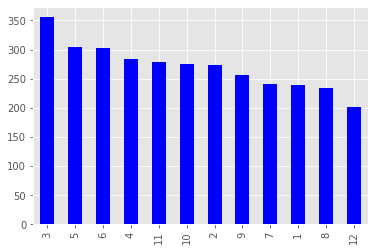

In [ ]:
short_tweets['month'].sort_values(ascending=False).value_counts().plot(kind='bar',color='blue')


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
short_tweets[short_tweets['year']==2021]['text']


0      Σημεία δωρεάν ελέγχου #COVID19 από τις #ΚΟΜΥ τ...
1      Ημερήσια έκθεση επιτήρησης #COVID19  (10/07/20...
2      RT @arkouman: Ο μέσος όρος ηλικίας των 2.327 ν...
3      Σημεία δωρεάν ελέγχου #COVID19, σε ολόκληρη τη...
4      Ημερήσια έκθεση επιτήρησης #COVID19  (09/07/20...
                             ...                        
576    2021: Διεθνής χρονιά για τη σημασία φρούτων &a...
577    Ημερήσια έκθεση επιτήρησης #COVID19 (3/1/2021)...
578    Ημερήσια έκθεση επιτήρησης #COVID19 (2/1/2021)...
579    RT @arkouman: Με τη χρηματοδότηση των 9,5 εκατ...
580    Ημερήσια έκθεση επιτήρησης #COVID19 (1/1/2021)...
Name: text, Length: 581, dtype: object

In [ ]:
text = short_tweets[short_tweets['year']==2021]['text'].str.cat(sep = ' ').replace("amp", ' ')

In [ ]:
text

'Σημεία δωρεάν ελέγχου #COVID19 από τις #ΚΟΜΥ του #ΕΟΔΥ – Κυριακή 11 Ιουλίου   Ημερήσια έκθεση επιτήρησης #COVID19  (10/07/2021) - #ΕΟΔΥ   RT @arkouman: Ο μέσος όρος ηλικίας των 2.327 νέων εργαστηριακά επιβεβαιωμένων κρουσμάτων της νόσου που ανακοινώθηκαν σήμερα από τον #ΕΟΔΥ ε… Σημεία δωρεάν ελέγχου #COVID19, σε ολόκληρη την επικράτεια, από τις #ΚΟΜΥ του #ΕΟΔΥ- Σάββατο 10 Ιουλίου   Ημερήσια έκθεση επιτήρησης #COVID19  (09/07/2021) - #ΕΟΔΥ   Σημεία δωρεάν ελέγχου #COVID19 από τις #ΚΟΜΥ του #ΕΟΔΥ – Παρασκευή 9 Ιουλίου   RT @arkouman: Rapid test για την ανίχνευση του SARS-CoV-2 από κλιμάκια του ΕΟΔΥ κατά την άφιξη επιβατών στο λιμάνι του Πειραιά. #ΕΟΔΥ #Υπου… Ημερήσια έκθεση επιτήρησης #COVID19 (08/07/2021)  #ΕΟΔΥ:   Την Τετάρτη 7 Ιουλίου, πραγματοποιήθηκε δειγματοληπτικός έλεγχος από κλιμάκια του ΕΟΔΥ στους επιβάτες και το πλήρωμα πλοίου κατά την άφιξη του στο λιμάνι της Ραφήνας από την Ιο. Στα 81 test που διενεργήθηκαν ανευρέθηκαν 14 θετικά (17,28% θετικότητα). Ο MO ηλικίας είναι 18,9 

In [ ]:
list(STOPWORDS)[0:20]


["can't",
 'most',
 'down',
 'or',
 'our',
 'she',
 "i'm",
 'then',
 'however',
 'was',
 'further',
 "isn't",
 "didn't",
 'else',
 'her',
 "that's",
 'can',
 'being',
 'themselves',
 'from']

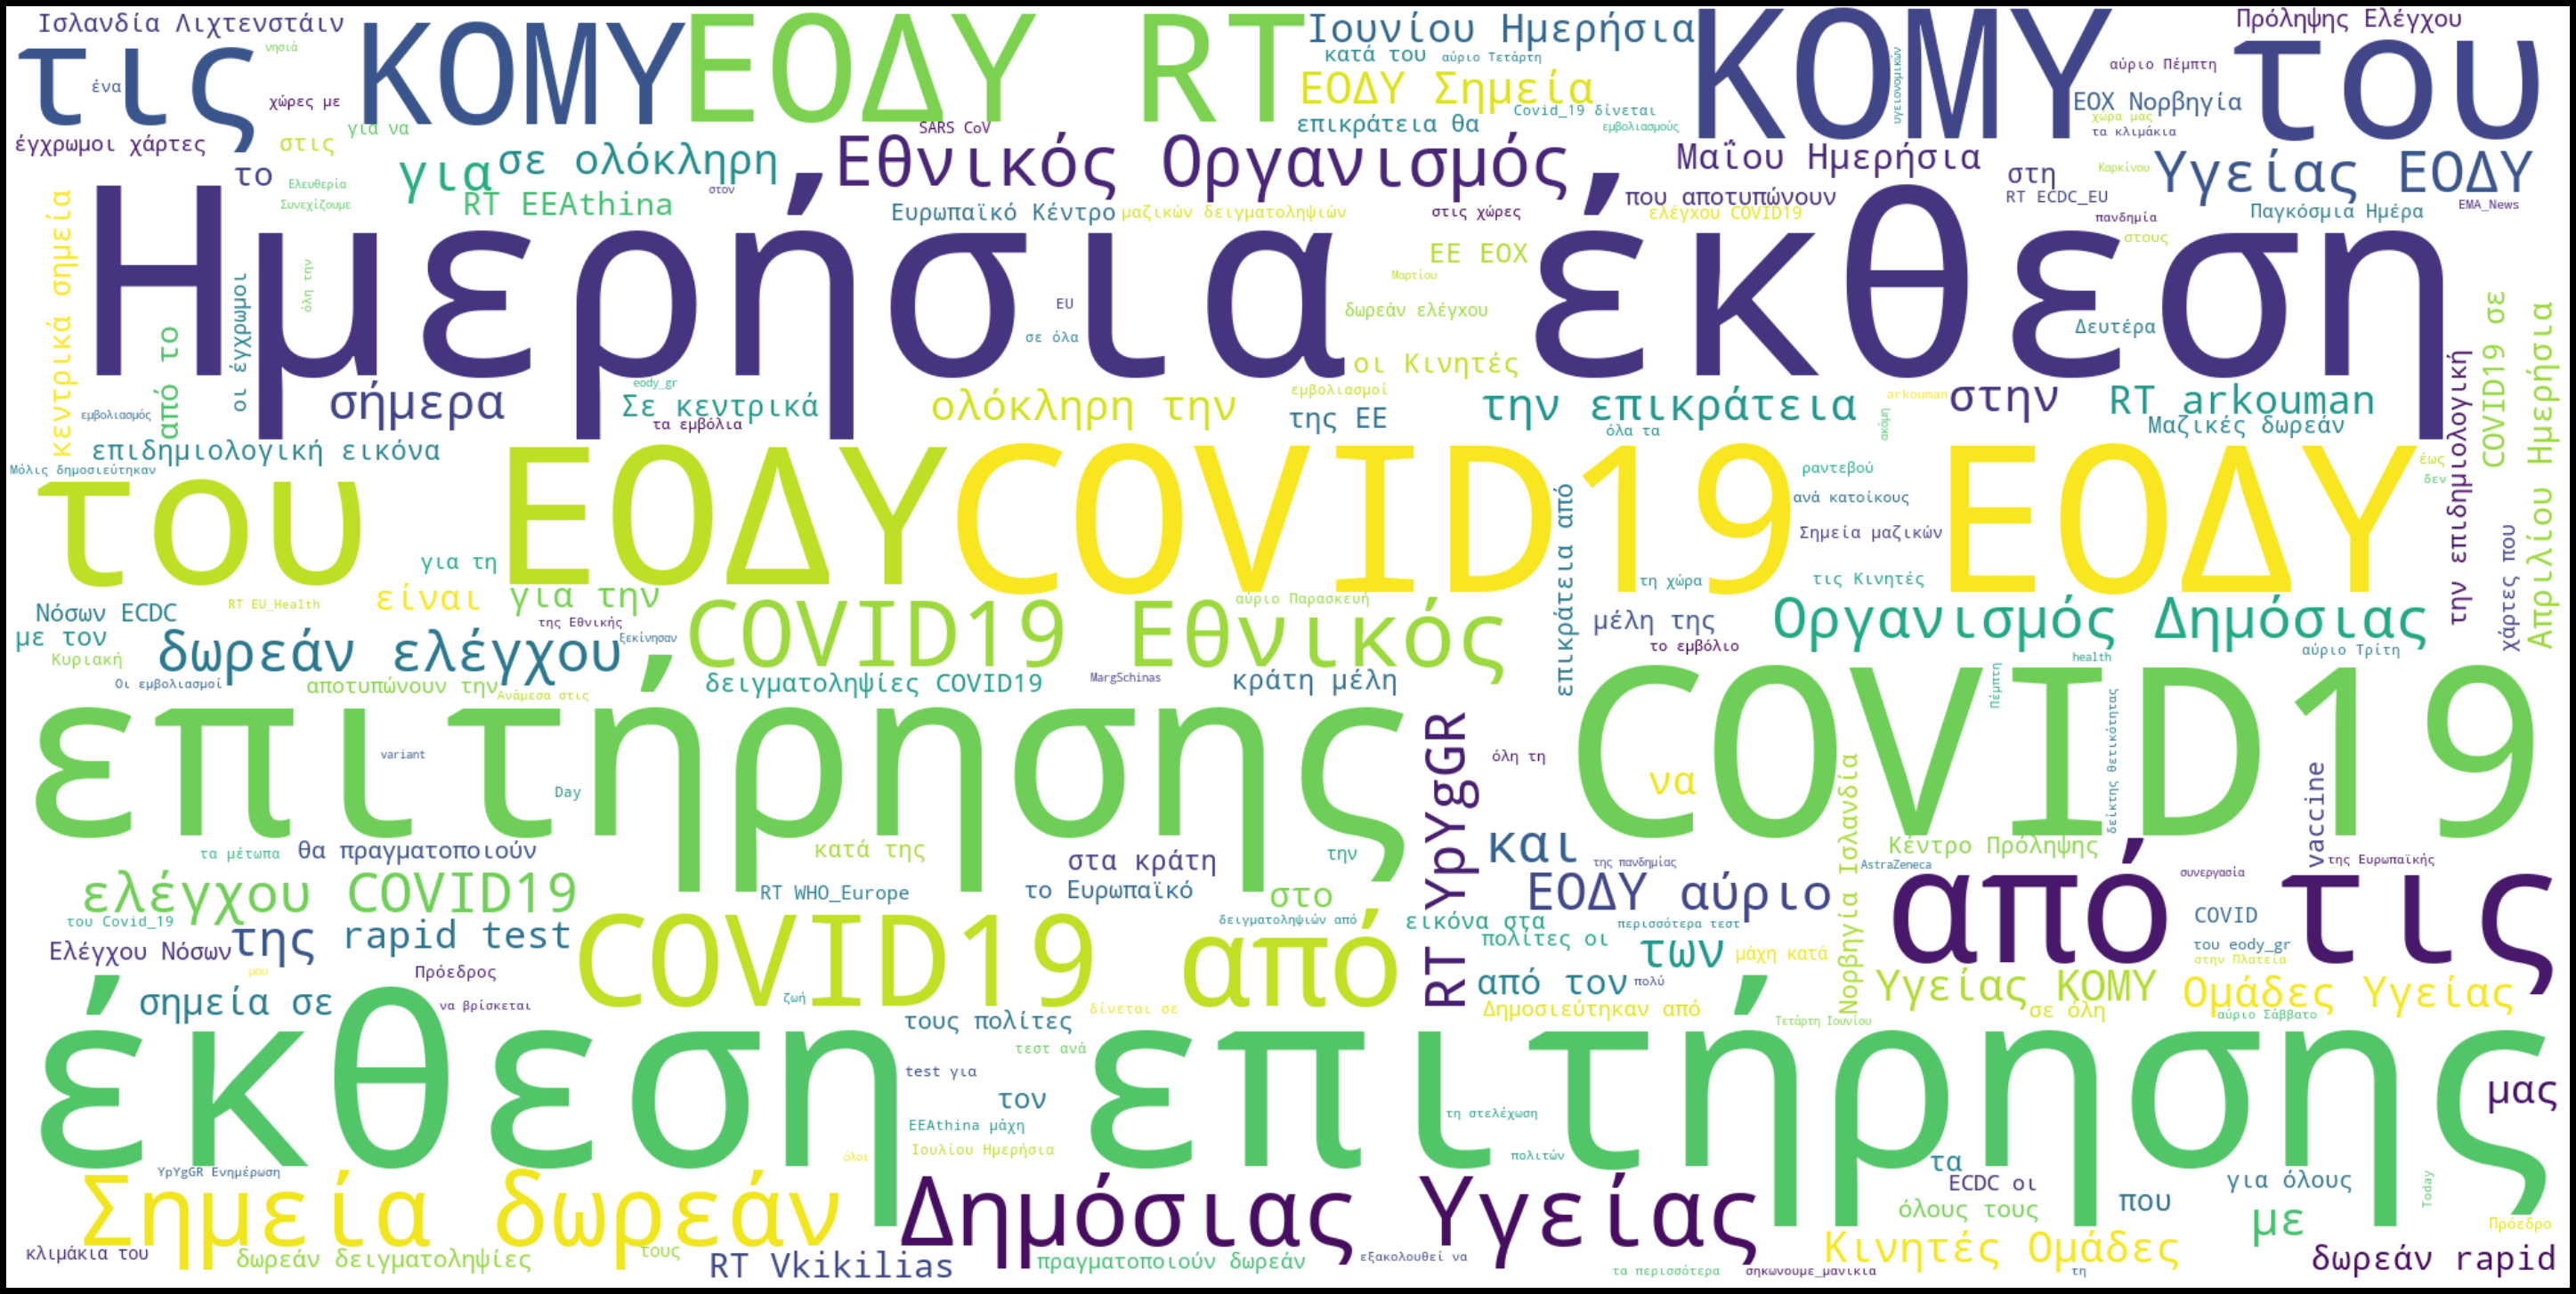

In [ ]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'white'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import time
import os
import ast
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

import itertools
import re


import nltk
from nltk.corpus import stopwords

In [ ]:
df.columns


Index(['headline', 'url', 'date', 'tokenized', 'uniq_wds'], dtype='object')

In [ ]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [ ]:
df.shape


(630, 5)

In [ ]:
import string
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

In [ ]:
df['tokenized'] = df['headline'].map(lambda x: clean_text(x))


In [ ]:
df['uniq_wds'] = df['tokenized'].str.split().apply(lambda x: len(set(x)))
df['uniq_wds'].head()


0    18
1     9
2    11
3    11
4    13
Name: uniq_wds, dtype: int64

In [ ]:
df['uniq_wds'].mean()


12.03015873015873

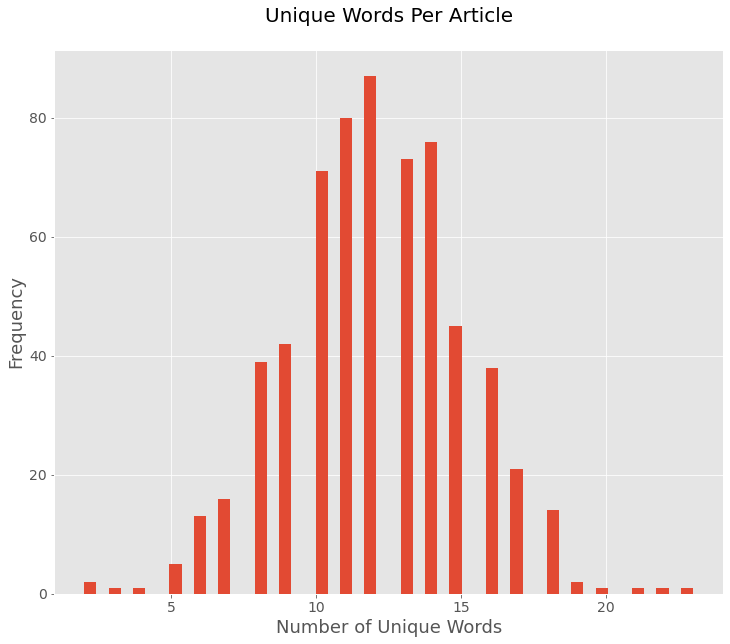

In [ ]:
ax=df['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);

In [ ]:
from collections import Counter

wd_counts = Counter()
for i, row in df.iterrows():
    wd_counts.update(row['tokenized'].split())

In [ ]:
import spacy


In [ ]:
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
nlp = spacy.load('el_core_news_sm')


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(short_tweets['text'])


In [ ]:
count_vector.shape


(3248, 11969)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

00  000  003  005  00h  01  02  03  04  05  054  06  07  072  073  077  08  \
0   0    0    0    0    0   0   0   0   0   0    0   0   0    0    0    0   0   
1   0    0    0    0    0   0   0   0   0   0    0   0   1    0    0    0   0   
2   0    0    0    0    0   0   0   0   0   0    0   0   0    0    0    0   0   
3   0    0    0    0    0   0   0   0   0   0    0   0   0    0    0    0   0   
4   0    0    0    0    0   0   0   0   0   0    0   0   1    0    0    0   0   

   08oct2018  09  10  100  1000  101  102  103  10306  106  107  108  1082  \
0          0   0   0    0     0    0    0    0      0    0    0    0     0   
1          0   0   1    0     0    0    0    0      0    0    0    0     0   
2          0   0   0    0     0    0    0    0      0    0    0    0     0   
3          0   0   1    0     0    0    0    0      0    0    0    0     0   
4          0   1   0    0     0    0    0    0      0    0    0    0     0   

   10th  10yearsofeuphem  10πμ  11  110  111  112  11200  112_sos  1135  115  \
0     0                0     0   1    0    0    0      0        0     0    0   
1     0                0     0   0    0    0    0      0        0     0    0   
2     0                0     0   0    0    0    0      0        0     0    0   
3     0                0     0   0    0    0    0      0        0     0    0   
4     0                0     0   0    0    0    0      0        0     0    0   

   117  118  11832  11th  12  120  1200  12080  122  ...  όργωσαν  όρθια  όρο  \
0    0    0      0     0   0    0     0      0    0  ...        0      0    0   
1    0    0      0     0   0    0     0      0    0  ...        0      0    0   
2    0    0      0     0   0    0     0      0    0  ...        0      0    0   
3    0    0      0     0   0    0     0      0    0  ...        0      0    0   
4    0    0      0     0   0    0     0      0    0  ...        0      0    0   

   όρος  όρου  όρους  όσα  όσκαρ  όσο  όσοι  όσους  όσων  ότ  όταν  ότι  όχι  \
0     0     0      0    0      0    0     0      0     0   0     0    0    0   
1     0     0      0    0      0    0     0      0     0   0     0    0    0   
2     1     0      0    0      0    0     0      0     0   0     0    0    0   
3     0     0      0    0      0    0     0      0     0   0     0    0    0   
4     0     0      0    0      0    0     0      0     0   0     0    0    0   

   ύλης  ύποπτα  ύποπτου  ύποπτων  ύστερα  ώθηση  ώμο  ώρα  ώρας  ώρες  ώστε  \
0     0       0        0        0       0      0    0    0     0     0     0   
1     0       0        0        0       0      0    0    0     0     0     0   
2     0       0        0        0       0      0    0    0     0     0     0   
3     0       0        0        0       0      0    0    0     0     0     0   
4     0       0        0        0       0      0    0    0     0     0     0   

   𝐒𝐓𝐎𝐏  𝐚𝐦  𝐧𝐨𝐭𝐡𝐢𝐧𝐠  𝑎𝑚  𝑎𝑛  𝑖𝑛𝑠𝑒𝑐𝑡  𝒃𝒐𝒓𝒏  𝒏𝒆𝒗𝒆𝒓  𝒘𝒂𝒔  𝒘𝒊𝒔𝒉  𝗪𝗲  𝗯𝗲𝗲𝗻  \
0     0   0        0   0   0       0     0      0    0     0   0     0   
1     0   0        0   0   0       0     0      0    0     0   0     0   
2     0   0        0   0   0       0     0      0    0     0   0     0   
3     0   0        0   0   0       0     0      0    0     0   0     0   
4     0   0        0   0   0       0     0      0    0     0   0     0   

   𝗳𝗼𝗿𝘄𝗮𝗿𝗱  𝗵𝗮𝘃𝗲  𝗹𝗼𝗼𝗸𝗶𝗻𝗴  𝗺𝗼𝗺𝗲𝗻  𝘁𝗵𝗶𝘀  𝘁𝗼  𝙽𝙾𝚃  𝚆𝚎  𝚗𝚎𝚎𝚍  𝚜𝚘𝚕𝚒𝚍𝚊𝚛𝚒𝚝𝚢  𝚜𝚝𝚒𝚐𝚖𝚊  
0        0     0        0      0     0   0    0   0     0           0       0  
1        0     0        0      0     0   0    0   0     0           0       0  
2        0     0        0      0     0   0    0   0     0           0       0  
3        0     0        0      0     0   0    0   0     0           0       0  
4        0     0        0      0     0   0    0   0     0           0       0  

[5 rows x 11969 columns]

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)


In [ ]:
count_vector = cv.fit_transform(short_tweets['text'])


In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
df

headline  \
0    \nΤην Ιατρική επιλέγει ο Δημήτρης από τη Ναύπα...   
1    \nΤον πρώτο φετινό θάνατο από Covid ανακοίνωσα...   
2    \nΣαρηγιάννης: 18.000 κρούσματα ημερησίως τον ...   
3    \nΗ επιστροφή των rave πάρτι των 90s και ο εφι...   
4    \nΗ Βόρεια Κορέα απέρριψε το εμβόλιο της Astra...   
..                                                 ...   
625  \nΜπάιντεν: «Σκανδαλώδης» η αναχαίτιση του αερ...   
626  \nEE: «Eπίθεση στη δημοκρατία και στην ευρωπαϊ...   
627  \nΣιγκαπούρη: Μεικτές τάσεις στις τιμές του πε...   
628  \nΜαλαισία: Πάνω από 200 τραυματίες σε ατύχημα...   
629  \nΒραζιλία: Συνελήφθη ο Ιταλός μαφιόζος Ρόκο Μ...   

                                                   url  \
0    https://www.protothema.gr/greece/article/11421...   
1    https://www.protothema.gr/koronoios-live/artic...   
2    https://www.protothema.gr/koronoios-live/artic...   
3    https://www.protothema.gr/greece/article/11419...   
4    https://www.protothema.gr/world/article/114204...   
..                                                 ...   
625  https://www.protothema.gr/world/article/112711...   
626  https://www.protothema.gr/world/article/112711...   
627  https://www.protothema.gr/economy/article/1127...   
628  https://www.protothema.gr/world/article/112710...   
629  https://www.protothema.gr/world/article/112710...   

                          date  \
0    2021-07-11T12:04:00+03:00   
1    2021-07-11T10:29:28+03:00   
2    2021-07-11T09:52:00+03:00   
3    2021-07-11T08:11:33+03:00   
4    2021-07-10T21:38:00+03:00   
..                         ...   
625  2021-05-25T05:00:19+03:00   
626  2021-05-25T04:24:36+03:00   
627  2021-05-25T04:12:13+03:00   
628  2021-05-25T03:41:47+03:00   
629  2021-05-25T03:23:00+03:00   

                                             tokenized  uniq_wds  
0     την ιατρική επιλέγει ο δημήτρης από τη ναύπακ...        18  
1     τον πρώτο φετινό θάνατο από covid ανακοίνωσαν...         9  
2     σαρηγιάννης 18000 κρούσματα ημερησίως τον οκτ...        11  
3     η επιστροφή των rave πάρτι των 90s και ο εφιά...        11  
4     η βόρεια κορέα απέρριψε το εμβόλιο της astraz...        13  
..                                                 ...       ...  
625   μπάιντεν σκανδαλώδης η αναχαίτιση του αεροσκά...        11  
626   ee eπίθεση στη δημοκρατία και στην ευρωπαϊκή ...        16  
627   σιγκαπούρη μεικτές τάσεις στις τιμές του πετρ...         9  
628   μαλαισία πάνω από 200 τραυματίες σε ατύχημα σ...        14  
629   βραζιλία συνελήφθη ο ιταλός μαφιόζος ρόκο μορ...        15  

[630 rows x 5 columns]

**Βρίσκουμε τις 15 πιο συχνές λέξεις των τίτλων**

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκαστας', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικο', 'αλλοιώτικο', 'αφότο', 'βεβαιότατας', 'γρήγορο', 'δίχω', 'εαυτά', 'εκάστα', 'εκάστο', 'ετού', 'ετούτε', 'ευθύ', 'εχτέ', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιέ', 'ποιής', 'ποιώ', 'πολλός', 'προχθά', 'προχτή', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύτο', 'τούτε'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


...  2020  2021  astrazeneca  covid  covid-19  pfizer  self  test  \
0    0     0     0            0      0         0       0     0     0   
1    0     0     0            0      1         0       0     0     0   
2    0     0     0            0      0         0       0     0     0   
3    0     0     0            0      0         1       0     0     0   
4    0     0     0            1      0         0       0     0     0   

   ygeiamou  ακινήτο  ανοίγω  αποζημιώσει  απριλίο  βίντεο  βρετανίας  γίνω  \
0         0        0       0            0        0       0          0     0   
1         0        0       0            0        0       0          0     0   
2         0        0       0            0        0       0          0     0   
3         0        0       0            0        0       0          0     0   
4         0        0       0            0        0       0          0     0   

   δέλτα  δείτε  δηλώσει  δόσει  δόση  εκατ.  ελλάδα  εμβολίο  εμβολιασμένος  \
0      0      0        0      0     0      0       0        0              0   
1      0      0        0      0     0      0       0        0              0   
2      0      0        0      0     0      0       0        0              0   
3      0      0        0      0     0      0       0        0              0   
4      0      0        0      0     0      0       0        0              0   

   εμβολιασμένους  εμβολιασμό  εμβολιασμός  εμβολιαστώ  εμβόλιο  ενοίκιο  \
0               0           0            0           0        0        0   
1               0           0            0           0        0        0   
2               0           0            0           0        0        0   
3               0           0            0           0        0        0   
4               0           0            0           0        1        0   

   ενοικία  εποχή  εστίαση  ετά  ευρώ  ευρώπη  ηπο  θάνατοι  ιουλίου  ιουνίου  \
0        0      0        0    0     0       0    0        0        0        0   
1        0      0        0    0     0       0    0        0        0        0   
2        0      0        0    0     0       0    0        0        0        0   
3        0      0        0    0     0       0    0        0        0        0   
4        0      0        0    0     0       0    0        0        0        0   

   ιταλία  κάνω  καραντίνα  κορωνοϊό  κορωνοϊός  κρούσμαα  κυβέρνηση  λέω  \
0       0     0          0         0          0         0          0    0   
1       0     0          0         0          0         0          0    0   
2       0     0          0         0          0         1          0    0   
3       0     0          0         0          0         0          0    0   
4       0     0          0         0          0         0          0    0   

   μέτρο  μειωμένος  μετάλλαξη  μητσοτάκη  μπορώ  νέος  νησί  νοσοκομείο  \
0      0          0          0          0      0     0     0           0   
1      0          0          0          0      0     0     0           0   
2      0          0          0          0      0     0     0           0   
3      0          0          0          0      0     0     0           0   
4      0          0          0          0      0     0     0           0   

   παιδί  πανδημία  πιστοποιητικό  πλήρως  πλατφόρμα  ρωσία  σήμερα  τζόνσον  \
0      0         0              0       0          0      0       0        0   
1      0         0              0       0          0      0       0        0   
2      0         0              0       0          0      0       0        0   
3      0         0              0       0          0      0       0        0   
4      0         0              0       0          0      0       0        0   

   τουρισμό  τουρκία  υγεία  φωτογραφία  χώρα  ψηφιακό  
0         0        0      0           0     0        0  
1         0        0      0           0     0        0  
2         0        0      0           0     0        0  
3         0        0      0           0  

In [ ]:
results.sum(axis =0).sort_values(ascending = False).head(16)


covid            96
μητσοτάκη        34
ελλάδα           32
νέος             31
εμβόλιο          29
βρετανίας        28
κορωνοϊό         28
κρούσμαα         24
πιστοποιητικό    23
εμβολίο          22
...              21
εμβολιασμός      21
μετάλλαξη        20
ψηφιακό          20
κορωνοϊός        17
παιδί            17
dtype: int64

**Φτιάχνουμε διγράμματα**

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

2020 εθνικός  2021 εοδυ  for the  in the  of the  rt arkouman  rt ecdc_eu  \
0             0          0        0       0       0            0           0   
1             0          1        0       0       0            0           0   
2             0          0        0       0       0            1           0   
3             0          0        0       0       0            0           0   
4             0          1        0       0       0            0           0   

   rt eeathina  rt vkikilias  rt ypyggr  the eu  to the  έκθεση επιτήρησης  \
0            0             0          0       0       0                  0   
1            0             0          0       0       0                  1   
2            0             0          0       0       0                  0   
3            0             0          0       0       0                  0   
4            0             0          0       0       0                  1   

   δημόσιας υγείας  εθνικός οργανισμός  επιτήρησης covid19  ημερήσια έκθεση  \
0                0                   0                   0                0   
1                0                   0                   1                1   
2                0                   0                   0                0   
3                0                   0                   0                0   
4                0                   0                   1                1   

   κομυ εοδυ  οργανισμός δημόσιας  υγείας εοδυ  
0          1                    0            0  
1          0                    0            0  
2          0                    0            0  
3          1                    0            0  
4          0                    0            0

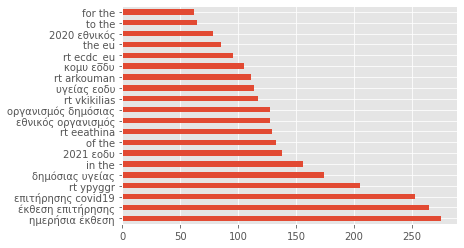

In [ ]:
results.sum(axis =0).sort_values(ascending = False).plot(kind='barh')


**Ψάχνουμε τα ελληνικά stopwords**

In [ ]:
list(nlp.Defaults.stop_words)[0:15]


['κάτι',
 'αμέσως',
 'μήδε',
 'μακάρι',
 'όποιο',
 'τη',
 'εξ',
 'κατόπιν',
 'εντωμεταξύ',
 'δι',
 'όχι',
 'εσάς',
 'αν',
 'μάλιστα',
 'όλου']

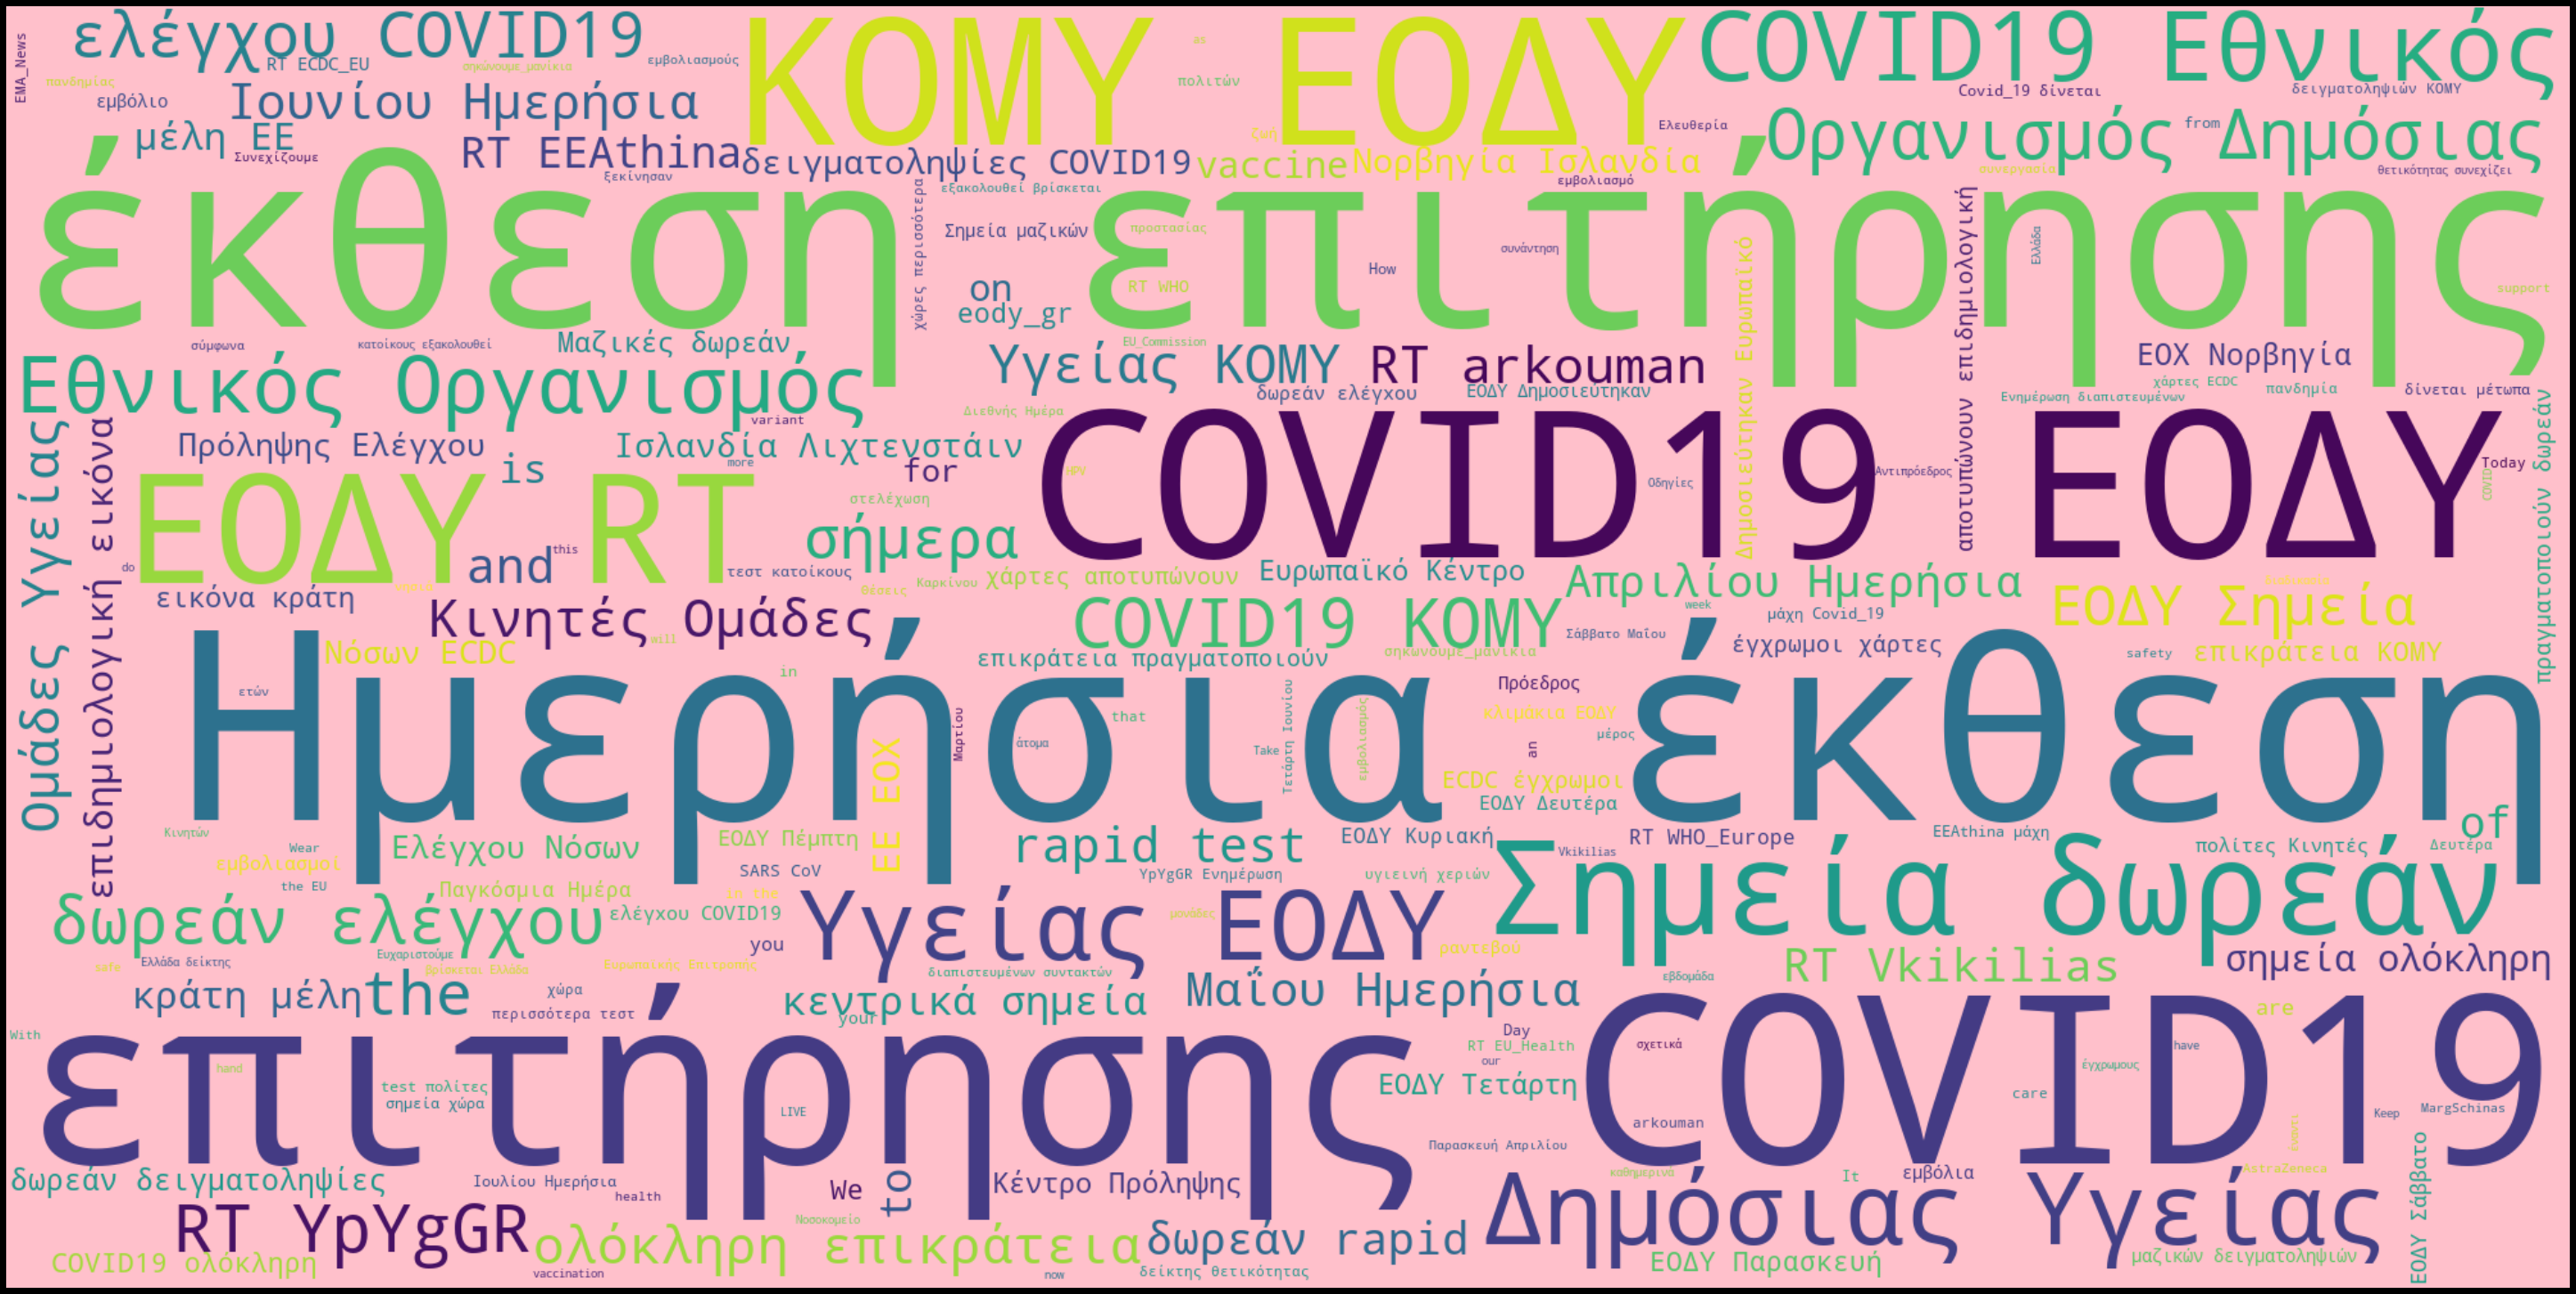

In [ ]:

wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'pink'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Βρίσκουμε την πολικότητα και τα συναισθήματα των κειμένων μας, μέσω της χρήσης ελληνικού λεξικού**

In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head(10)

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   
5            ορμος       0.0       0.0    0.0           0.0      0.0   0.0   
6             υδρα       0.0       1.0    0.0           0.0      0.0   1.0   
7     αγια τραπεζα       0.0       0.0    0.0           0.0      0.0   0.0   
8             αμην       1.0       0.0    0.0           0.0      0.0   0.0   
9           απατσι       0.0       1.0    0.0           0.0      0.0   1.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0  
5  0.0      0.0       0.0    0.0  
6  0.0      0.0       0.0    0.0  
7  0.0      0.0       0.0    0.0  
8  1.0      0.0       0.0    1.0  
9  0.0      0.0       0.0    0.0

In [ ]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13170          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13166  0.0      0.0       1.0    0.0  
13167  0.0      0.0       0.0    0.0  
13168  0.0      0.0       0.0    0.0  
13169  0.0      0.0       0.0    0.0  
13170  0.0      0.0       0.0    0.0

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [ ]:
emolex_df.tail()

index          word  Positive  Negative  Anger  Anticipation  Disgust  \
13156  13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   
13157  13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   
13158  13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   
13159  13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   
13160  13170          ζουμ       0.0       0.0    0.0           0.0      0.0   

       Fear  Joy  Sadness  Surprise  Trust  
13156   1.0  0.0      0.0       1.0    0.0  
13157   0.0  0.0      0.0       0.0    0.0  
13158   0.0  0.0      0.0       0.0    0.0  
13159   0.0  0.0      0.0       0.0    0.0  
13160   0.0  0.0      0.0       0.0    0.0

In [ ]:
emolex_df['word'].head(10)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
3                εχω
4               οριο
5              ορμος
6               υδρα
7       αγια τραπεζα
8               αμην
9             απατσι
Name: word, dtype: object

In [ ]:
short_tweets['date'] = pd.to_datetime(short_tweets['date'], format='%a %b %d %H:%M:%S +0000 %Y')


In [ ]:
short_tweets.head()

date                                               text  \
0 2021-07-10 18:45:48  Σημεία δωρεάν ελέγχου #COVID19 από τις #ΚΟΜΥ τ...   
1 2021-07-10 14:42:25  Ημερήσια έκθεση επιτήρησης #COVID19  (10/07/20...   
2 2021-07-10 14:37:53  RT @arkouman: Ο μέσος όρος ηλικίας των 2.327 ν...   
3 2021-07-09 16:57:10  Σημεία δωρεάν ελέγχου #COVID19, σε ολόκληρη τη...   
4 2021-07-09 14:53:18  Ημερήσια έκθεση επιτήρησης #COVID19  (09/07/20...   

   year  month  day  
0  2021      7   10  
1  2021      7   10  
2  2021      7   10  
3  2021      7    9  
4  2021      7    9

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(short_tweets['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  αυτοκινητοδρομος  αυγουστος  βερολινο  βικτωρια  βοστωνη  \
0     0       0                 0          0         0         0        0   
1     0       0                 0          0         0         0        0   
2     0       0                 0          0         0         0        0   
3     0       0                 0          0         0         0        0   
4     0       0                 0          0         0         0        0   

   γαμηλιο ταξιδι  γεννηση παιδιου  γαιδαρος  γατα  γερμανος  γιαννης  \
0               0                0         0     0         0        0   
1               0                0         0     0         0        0   
2               0                0         0     0         0        0   
3               0                0         0     0         0        0   
4               0                0         0     0         0        0   

   γνωστοποιηση  γυαλια  διακοπη  διευθυντρια σχολειου  διδυμοι  δεξαμενη  \
0             0       0        0                     0        0         0   
1             0       0        0                     0        0         0   
2             0       0        0                     0        0         0   
3             0       0        0                     0        0         0   
4             0       0        0                     0        0         0   

   δευτερα παρουσια  δευτερον  δημοκρατια  διαρκεια ζωης  διαδρομη  \
0                 0         0           0              0         0   
1                 0         0           0              0         0   
2                 0         0           0              0         0   
3                 0         0           0              0         0   
4                 0         0           0              0         0   

   διαλογισμος  διεθνες  διευθυνσεις  δραμα  εξαρτηση  εξωτερικου χωρου  \
0            0        0            0      0         0                 0   
1            0        0            0      0         0                 0   
2            0        0            0      0         0                 0   
3            0        0            0      0         0                 0   
4            0        0            0      0         0                 0   

   επικοινωνω  επιπτωσεις  επιστροφη  εργαστηρι  εγγραφειτε  εκδηλωση  \
0           0           0          0          0           0         0   
1           0           0          0          0           0         0   
2           0           0          0          0           0         0   
3           0           0          0          0           0         0   
4           0           0          0          0           0         0   

   εκθεση ιδεων  εκκλησια  εν τω μεταξυ  ενταση ηχου  επικολληση  εποπτης  \
0             0         0             0            0           0        0   
1             0         0             0            0           0        0   
2             0         0             0            0           0        0   
3             0         0             0            0           0        0   
4             0         0             0            0           0        0   

   ...  εθελοντισμος  κανω εμετο  αναθηματικος  αποδειξη πληρωμης  \
0  ...             0           0             0                  0   
1  ...             0           0             0                  0   
2  ...             0           0             0                  0   
3  ...             0           0             0                  0   
4  ...             0           0             0                

In [ ]:
wordcount_df.shape

(3248, 13161)

In [ ]:
emolex_df.head()

index             word  Positive  Negative  Anger  Anticipation  Disgust  \
0      0            αφεση       1.0       0.0    0.0           0.0      0.0   
1      1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   
2      2          εχοντας       0.0       0.0    0.0           0.0      0.0   
3      3              εχω       0.0       0.0    0.0           0.0      0.0   
4      4             οριο       0.0       0.0    0.0           0.0      0.0   

   Fear  Joy  Sadness  Surprise  Trust  
0   0.0  0.0      0.0       0.0    0.0  
1   0.0  0.0      0.0       0.0    0.0  
2   0.0  0.0      0.0       0.0    0.0  
3   0.0  0.0      0.0       0.0    0.0  
4   0.0  0.0      0.0       0.0    0.0

In [ ]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']




In [ ]:
short_tweets.head(10)

date                                               text  \
0 2021-07-10 18:45:48  Σημεία δωρεάν ελέγχου #COVID19 από τις #ΚΟΜΥ τ...   
1 2021-07-10 14:42:25  Ημερήσια έκθεση επιτήρησης #COVID19  (10/07/20...   
2 2021-07-10 14:37:53  RT @arkouman: Ο μέσος όρος ηλικίας των 2.327 ν...   
3 2021-07-09 16:57:10  Σημεία δωρεάν ελέγχου #COVID19, σε ολόκληρη τη...   
4 2021-07-09 14:53:18  Ημερήσια έκθεση επιτήρησης #COVID19  (09/07/20...   
5 2021-07-08 17:31:46  Σημεία δωρεάν ελέγχου #COVID19 από τις #ΚΟΜΥ τ...   
6 2021-07-08 15:06:48  RT @arkouman: Rapid test για την ανίχνευση του...   
7 2021-07-08 15:02:51  Ημερήσια έκθεση επιτήρησης #COVID19 (08/07/202...   
8 2021-07-08 07:05:36  Την Τετάρτη 7 Ιουλίου, πραγματοποιήθηκε δειγμα...   
9 2021-07-07 18:06:01  Σημεία δωρεάν ελέγχου #COVID19 από τις #ΚΟΜΥ τ...   

   year  month  day  
0  2021      7   10  
1  2021      7   10  
2  2021      7   10  
3  2021      7    9  
4  2021      7    9  
5  2021      7    8  
6  2021      7    8  
7  2021      7    8  
8  2021      7    8  
9  2021      7    7

In [ ]:
short_tweets['anger'] = wordcount_df[angry_words].sum(axis=1)

short_tweets['positivity'] = wordcount_df[positive_words].sum(axis=1)


short_tweets['joy'] = wordcount_df[joy_words].sum(axis=1)


short_tweets['disgust'] = wordcount_df[disgust_words].sum(axis=1)



short_tweets['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_tweets['trust'] = wordcount_df[trust_words].sum(axis=1)


short_tweets['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


short_tweets['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_tweets['negative'] = wordcount_df[negative_words].sum(axis=1)

short_tweets['fear'] = wordcount_df[fear_words].sum(axis=1)




In [ ]:
short_tweets

date                                               text  \
0    2021-07-10 18:45:48  Σημεία δωρεάν ελέγχου #COVID19 από τις #ΚΟΜΥ τ...   
1    2021-07-10 14:42:25  Ημερήσια έκθεση επιτήρησης #COVID19  (10/07/20...   
2    2021-07-10 14:37:53  RT @arkouman: Ο μέσος όρος ηλικίας των 2.327 ν...   
3    2021-07-09 16:57:10  Σημεία δωρεάν ελέγχου #COVID19, σε ολόκληρη τη...   
4    2021-07-09 14:53:18  Ημερήσια έκθεση επιτήρησης #COVID19  (09/07/20...   
...                  ...                                                ...   
3243 2018-04-23 19:49:25  RT @wef: This is why everyone should be vaccin...   
3244 2018-04-23 19:45:53  RT @EUjamrai: We are happy to have Laura Marin...   
3245 2018-04-23 19:44:26  RT @_Prolepsis: Η Ευρωπαϊκή Εβδομάδα Εμβολιασμ...   
3246 2018-04-23 14:58:53  Μεθαύριο, στην Κέρκυρα για τη νόσο των Λεγεωνα...   
3247 2018-04-23 10:16:01  #VaccinesWork #ImmunizeEurope Ευρωπαϊκή Εβδομά...   

      year  month  day  anger  positivity  joy  disgust  surprise  trust  \
0     2021      7   10      0           0    0        0         0      0   
1     2021      7   10      0           1    0        0         0      0   
2     2021      7   10      0           0    0        0         0      0   
3     2021      7    9      0           0    0        0         0      0   
4     2021      7    9      0           1    0        0         0      0   
...    ...    ...  ...    ...         ...  ...      ...       ...    ...   
3243  2018      4   23      0           0    0        0         0      0   
3244  2018      4   23      0           0    0        0         0      0   
3245  2018      4   23      0           0    0        0         0      0   
3246  2018      4   23      0           0    0        0         1      0   
3247  2018      4   23      0           2    1        0         0      1   

      anticipation  sadness  negative  fear  
0                0        0         0     0  
1                0        0         0     0  
2                0        0         0     0  
3                0        0         0     0  
4                0        0         0     0  
...            ...      ...       ...   ...  
3243             0        0         0     0  
3244             0        0         0     0  
3245             1        0         0     0  
3246             0        0         1     0  
3247             1        0         0     0  

[3248 rows x 15 columns]

In [ ]:
short_tweets.set_index('date' , inplace=True)


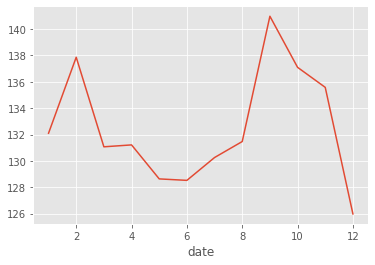

In [ ]:
short_tweets['text'].str.len().groupby(by=short_tweets.index.month).mean().plot()


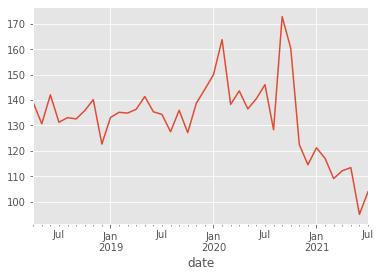

In [ ]:
short_tweets['text'].str.len().resample('M').mean().plot()


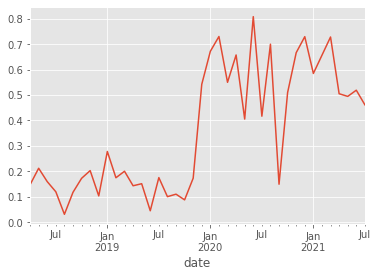

In [ ]:
short_tweets['positivity'].resample('M').mean().plot()


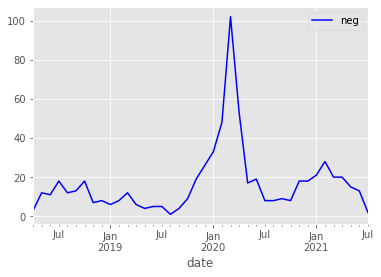

In [ ]:
short_tweets['negative'].resample('M').sum().plot(color = 'b',label = 'neg').legend()


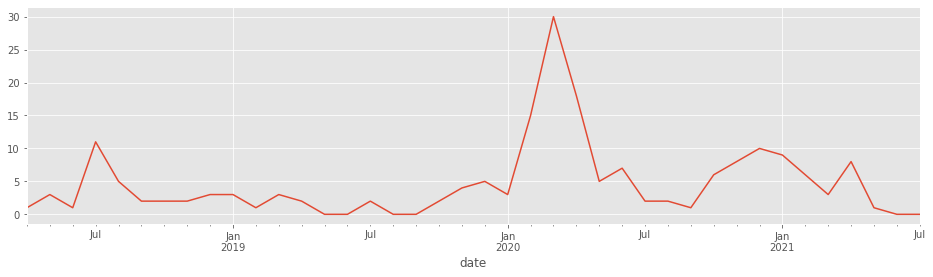

In [ ]:
short_tweets['anger'].resample('M').sum().plot(figsize=(16,4))


***Συγκρίνουμε τα συναισθήματα θυμού - χαράς για το μήνα Ιανουάριο, κάθε έτους ***

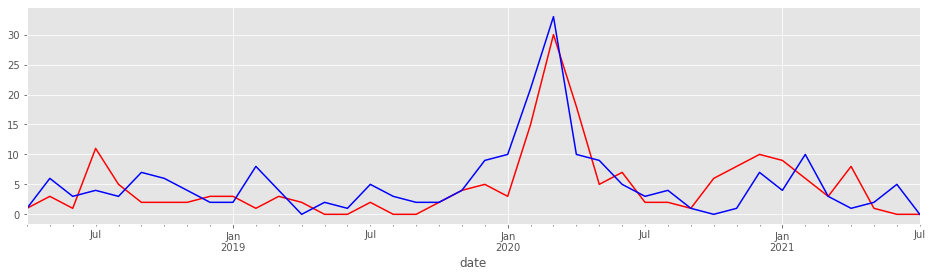

In [ ]:
ax = short_tweets['anger'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_tweets['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

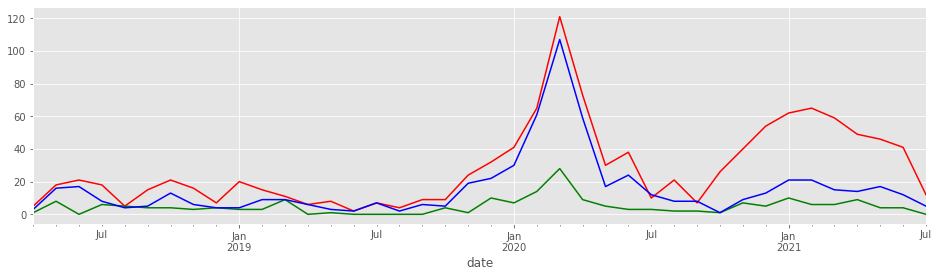

In [ ]:
ax = short_tweets['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_tweets['disgust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_tweets['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

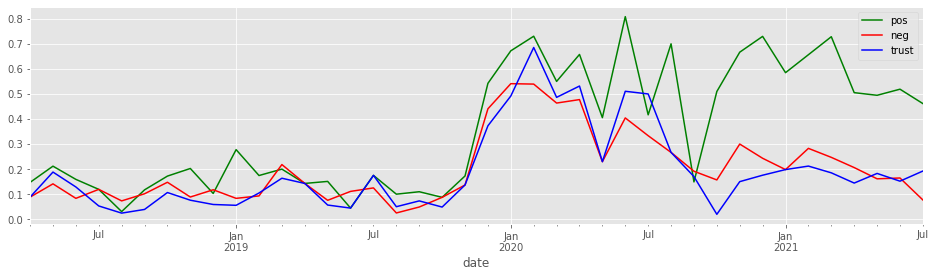

In [ ]:
ax = short_tweets['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
short_tweets['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
short_tweets['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

**Βρίσκουμε την ομοιότητα μεταξύ των κειμένων**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_tweets['text'])

In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

00  000   01   02   03   04   05   06        07   08        10  100  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.556075  0.0  0.430213  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.300702  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.615994  0.0  0.000000  0.0   

         11   12   13   14   15   16   17   18   19   20  2016  2017  2018  \
0  0.354743  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   
1  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   
2  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   
3  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   
4  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   

   2019  2020      2021   21   22   23   24   25   26   27   28   29   30  \
0   0.0   0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1   0.0   0.0  0.337297  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2   0.0   0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3   0.0   0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4   0.0   0.0  0.373642  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    31   55  about  across  after  against  all  amp  amr   an  and  \
0  0.0  0.0    0.0     0.0    0.0      0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0    0.0     0.0    0.0      0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0    0.0     0.0    0.0      0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0    0.0     0.0    0.0      0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0    0.0     0.0    0.0      0.0  0.0  0.0  0.0  0.0  0.0   

   antibiotics  ...  ολόκληρη  ομάδες  οργανισμού  οργανισμός  πέμπτη  \
0          0.0  ...  0.000000     0.0         0.0         0.0     0.0   
1          0.0  ...  0.000000     0.0         0.0         0.0     0.0   
2          0.0  ...  0.000000     0.0         0.0         0.0     0.0   
3          0.0  ...  0.342036     0.0         0.0         0.0     0.0   
4          0.0  ...  0.000000     0.0         0.0         0.0     0.0   

   παγκόσμια  παρασκευή  περισσότερα  πλαίσιο  πολίτες  πολιτικής  πολιτών  \
0        0.0        0.0          0.0      0.0      0.0        0.0      0.0   
1        0.0        0.0          0.0      0.0      0.0        0.0      0.0   
2        0.0        0.0          0.0      0.0      0.0        0.0      0.0   
3        0.0        0.0          0.0      0.0      0.0        0.0      0.0   
4        0.0        0.0          0.0      0.0      0.0        0.0      0.0   

   πραγματοποιούν  προστασία  προστασίας  προσφύγων  προσωπικό  πρόγραμμα  \
0             0.0        0.0         0.0        0.0        0.0        0.0   
1             0.0        0.0         0.0        0.0        0.0        0.0   
2             0.0        0.0         0.0        0.0        0.0        0.0   
3             0.0        0.0         0.0        0.0        0.0        0.0   
4             0.0        0.0         0.0        0.0        0.0        0.0   

   πρόεδρο  πρόεδρος  πρόληψης  πύλες   σάββατο    σήμερα    σημεία  σπίτι  \
0      0.0       0.0       0.0    0.0  0.000000  0.000000  0.321755    0.0   
1      0.0       0.0       0.0    0.0  0.000000  0.000000  0.000000    0.0   
2      0.0       0.0       0.0    0.0  0.000000  0.421471  0.000000    0.0   
3      0.0       0.0       0.0    0.0  0.392443  0.000000  0.282377    0.0   
4      0.0       0.0       0.0    0.0  0.000000  0.000000  0.000000    0.0   

   συνδέονται  συνεργασία  συνεχίζουμε  συνολικός  συρροές  σχετικά  \
0         0.0         0.0          0.0        0.0      0.0      0.0   
1         0.0         0.0          0.0        0.0      0.0      0.0   
2         0.0         0.0          0.0        0.0      0.0      0.0   
3         0.0         0.0          0.0        0.0      0.0      0.0   

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.09255897 0.05063426 ... 0.         0.         0.        ]]


In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))

cosine scores ==>  [[1.         0.09255897 0.05063426 ... 0.         0.         0.        ]
 [0.09255897 1.         0.06357649 ... 0.         0.         0.        ]
 [0.05063426 0.06357649 1.         ... 0.01406139 0.         0.        ]
 ...
 [0.         0.         0.01406139 ... 1.         0.         0.46204301]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.46204301 0.         1.        ]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

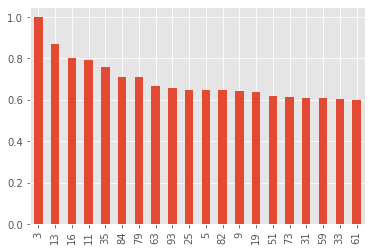

In [ ]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [ ]:
df['headline'].loc[3]

'\nΗ επιστροφή των rave πάρτι των 90s και ο εφιάλτης του COVID-19\n'

In [ ]:
df['headline'].loc[61]

'\n74ο Φεστιβάλ των Καννών: Η μεγάλη επιστροφή του παγκόσμιου κινηματογράφου (φωτογραφίες)\n'

In [ ]:
df['headline'].loc[79]

'\nΓιατί η Επιτροπή είπε «ναι» στον εμβολιασμό των εφήβων 15-17 ετών\n'

In [ ]:
df['headline'].loc[59]

'\nNot getting COVID Injection Is a ‘Sin,’ Anti-Vaxxers Must Spend Their Lives Repenting, Says Russian Orthodox Church\n'

In [ ]:
df['headline'].loc[33]

'\nΒρετανία: Ο συνωστισμός στο Γουέμπλεϊ μπορεί να προκαλέσει 100.000 κρούσματα Covid ημερησίως\n'